# Feature generation for enzymes using Rosetta 

Here, we are determining the thermal stability of about a hundred and fifty point mutants of BglB (model based on 2JIE). After automated mutagensis of the BglB coding sequence, protein production, and protein purification, each mutant's activity at 100 mM pNPG at pH 7.4 at a range of temperatures from 30 C to 50 C was measured using the rate of formation of the pNPG hydrolysis product p-nitrophenol. 

We have expression data for about 150 and Tms for about 70 mutants (along with kinetic constants for another 100 or so). Let's generate some features based on the Rosetta models. 

In [8]:
import pandas

df = pandas.read_csv( 'data/clean/production.csv', index_col='mutant' )
df['pos'] = df.index.str[1:-1].astype( int )
df['designed'] = df.index.str[-1:]
df.drop( 'WT', inplace=True ) 

## Rosetta modeling using `ddg_monomer` 

In [9]:
# makes resfiles for DDG Rosetta app 
#!mkdir ddg/resfiles 

for ( index, series ) in df.iterrows():
    with open( 'protocols/ddg/resfiles/{}'.format( index ), 'w' ) as fn:
        fn.write( 'NATRO\nSTART\n{} A PIKAA {}'.format( series.pos, series.designed ) )

In [10]:
! ls protocols/ddg/resfiles/

A192S E154D E180L E406A F75H  H178A I244N L171A M323K N220G N293D Q19C  R240E S19A  T218A W120H W328L W407A Y169P
A195S E164A E222A E406D G355A H178R I247N L171R M358T N220H N293Q Q19S  R240K S298E T296A W325A W34A  W407G Y18A
A356A E164G E222H E423S H101R H315E I300N L174R M361T N220R N354A Q22S  R76A  S331A T352A W325C W399A W407Q Y294A
A357A E164R E222K E426S H119A H315N I303N L219A N163A N220Y N404A Q313R S14A  S334A V147S W325G W399C W407R Y294F
A408A E177A E222Q F405A H119E H373R I91E  L362M N163C N223G N404C Q316R S16A  S400A V52G  W325H W399G W409A Y295A
C167A E177K E222R F415A H119N H379R K341A M221A N163D N223H N407C Q384R S16N  T15A  V55G  W325L W399R W409Y Y295G
C167Q E177L E222Y F415N H122E H379T K344A M261D N166D N293A P329N R240A S17A  T175R W120A W325R W399S WT    Y297F
D403A E180K E353A F72H  H122N I244E K413A M323A N220A N293C Q19A  R240D S17E  T178R W120F W328C W402C Y166P


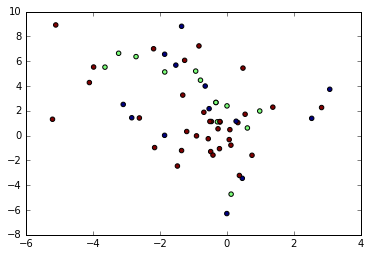

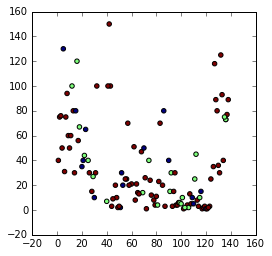

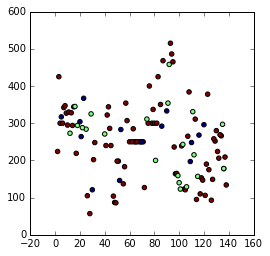

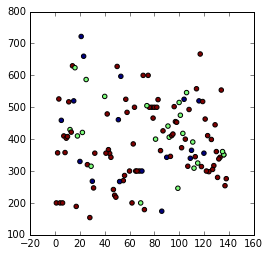

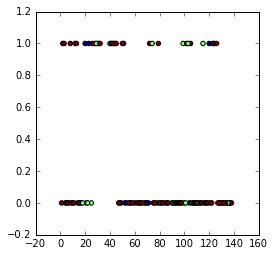

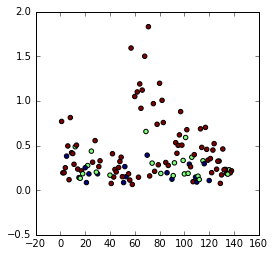

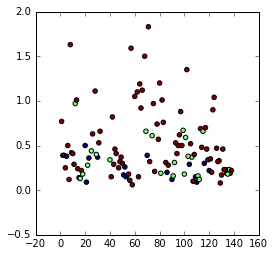

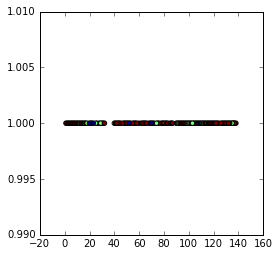

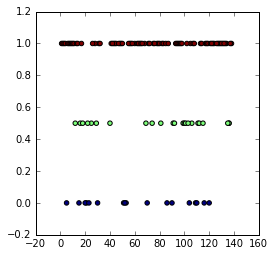

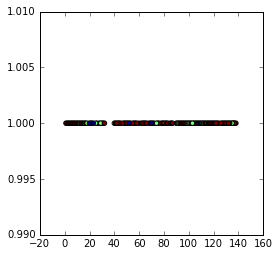

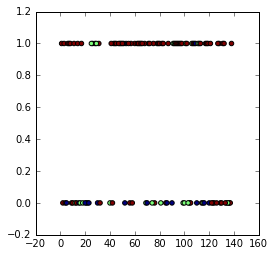

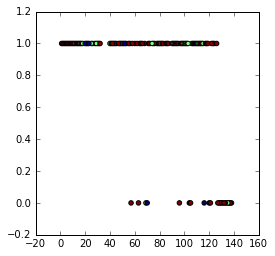

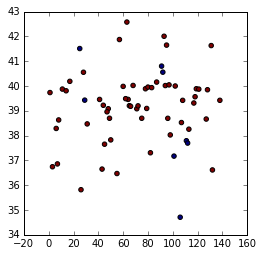

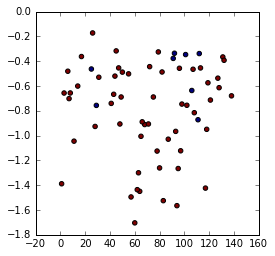

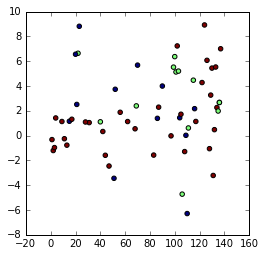

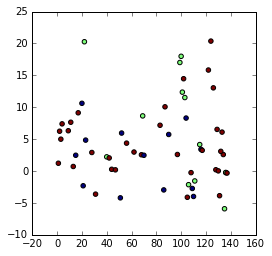

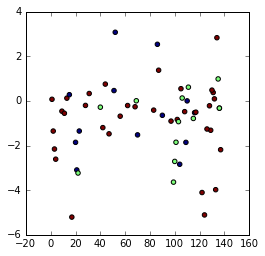

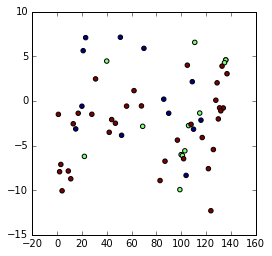

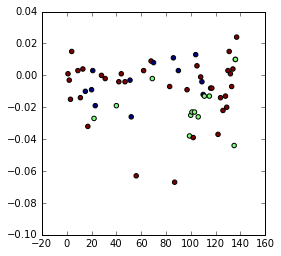

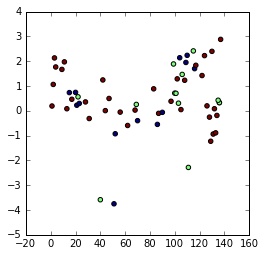

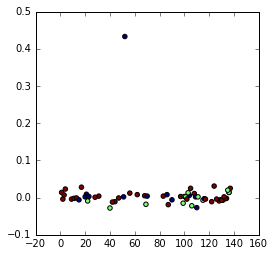

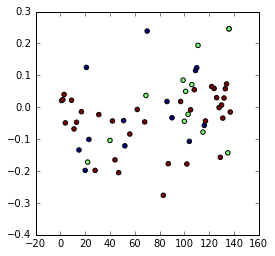

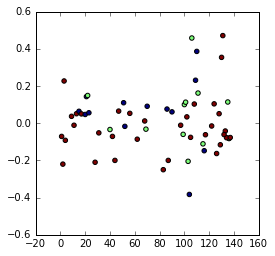

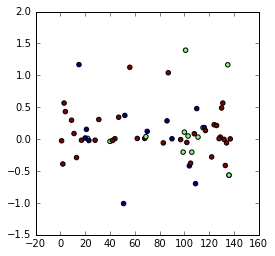

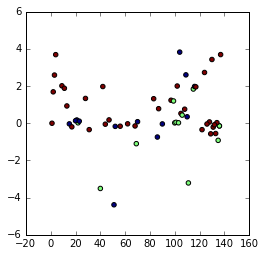

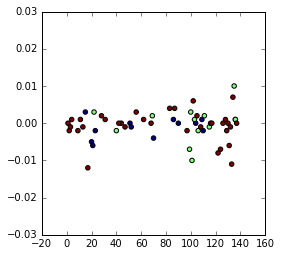

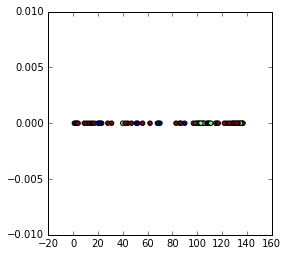

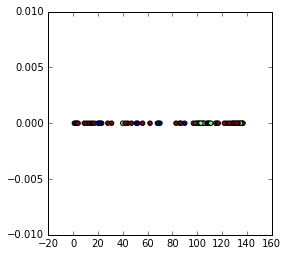

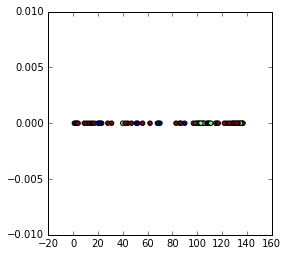

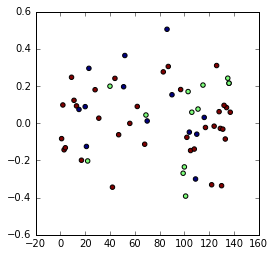

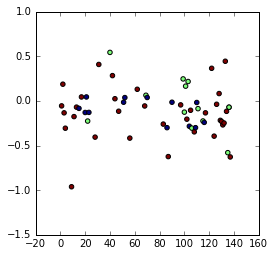

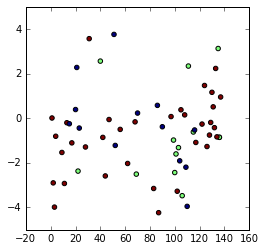

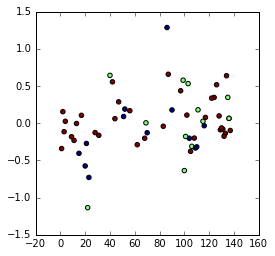

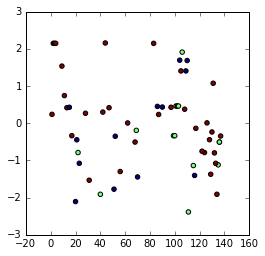

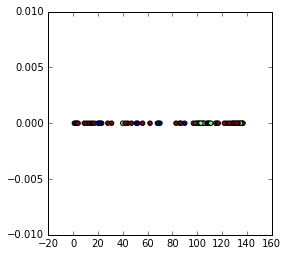

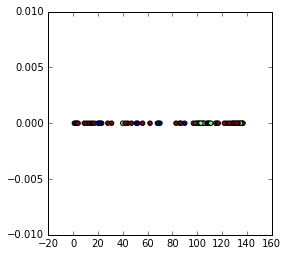

float64


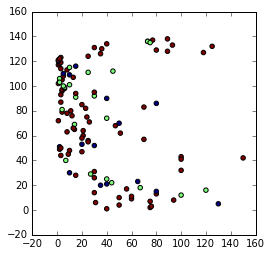

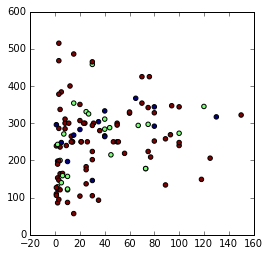

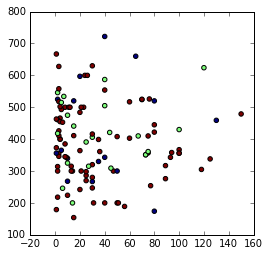

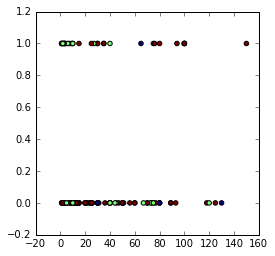

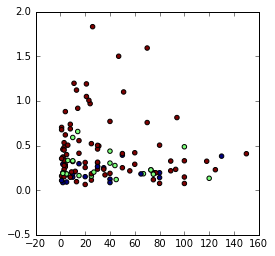

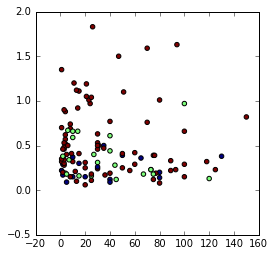

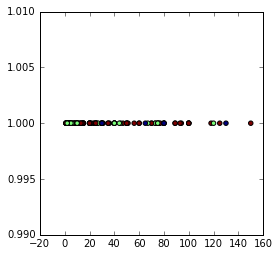

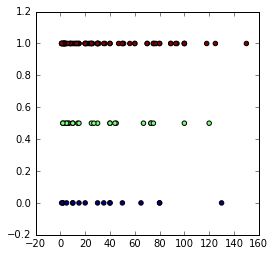

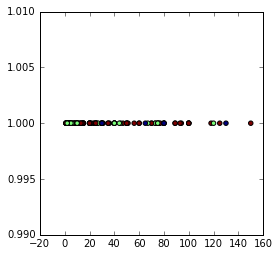

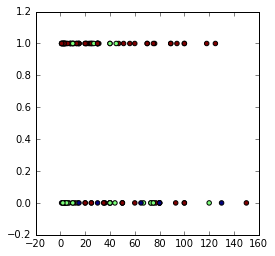

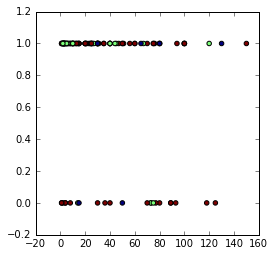

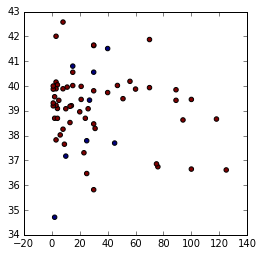

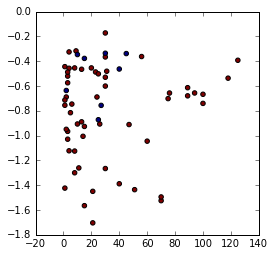

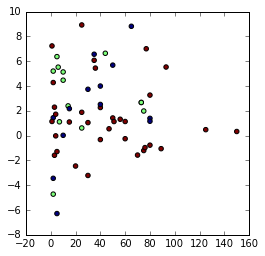

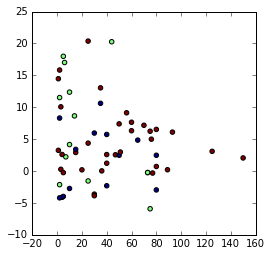

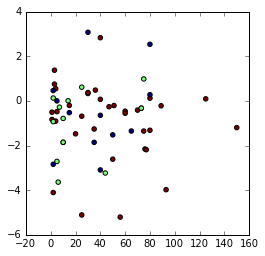

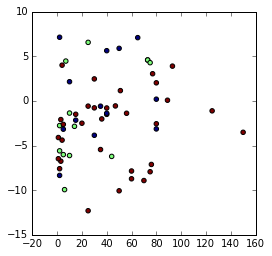

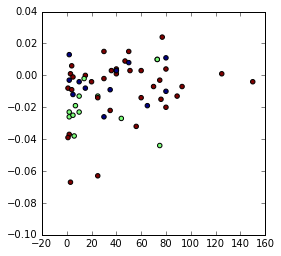

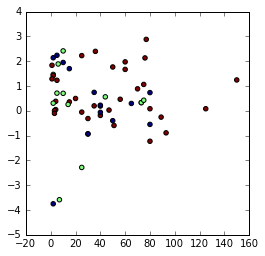

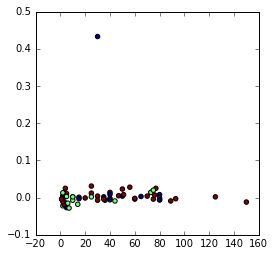

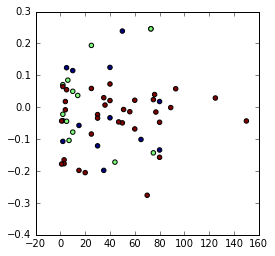

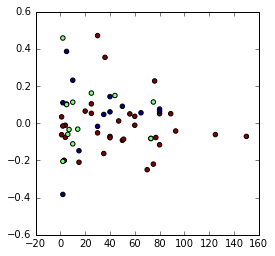

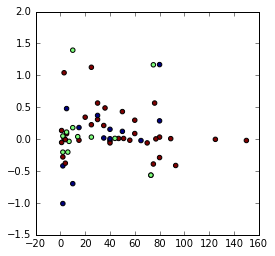

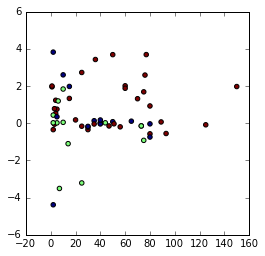

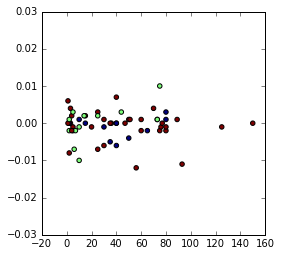

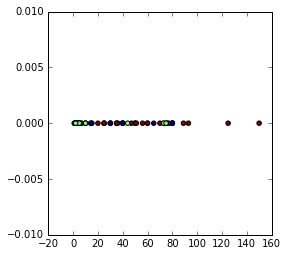

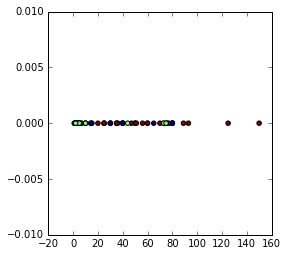

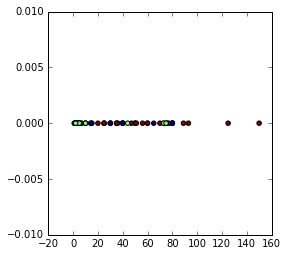

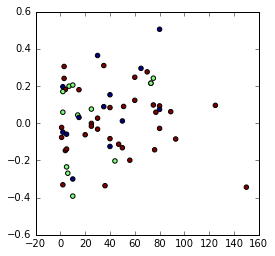

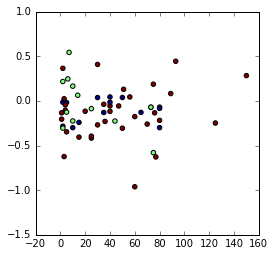

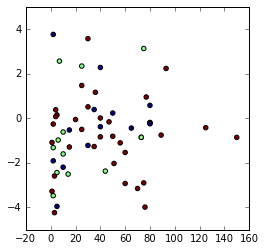

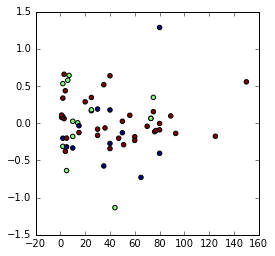

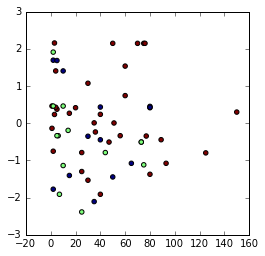

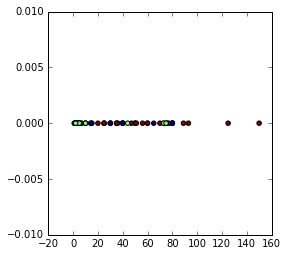

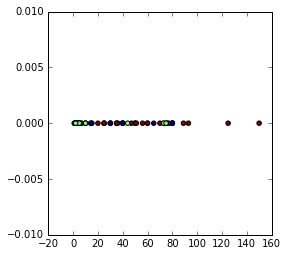

float64


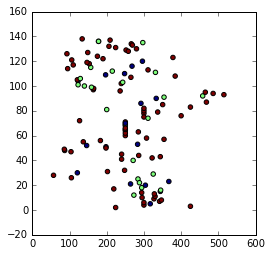

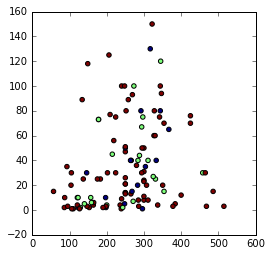

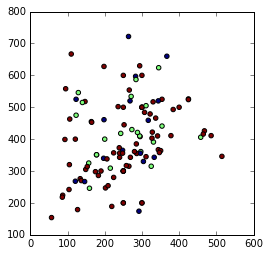

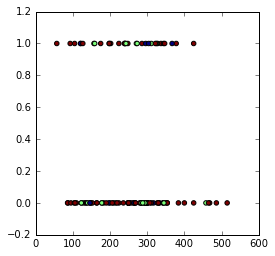

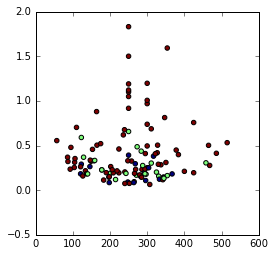

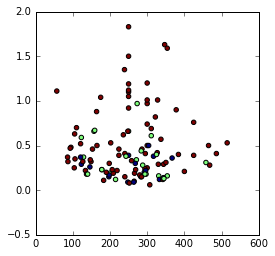

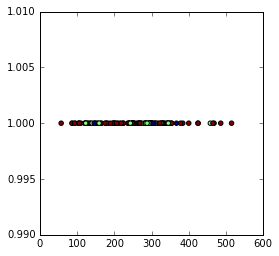

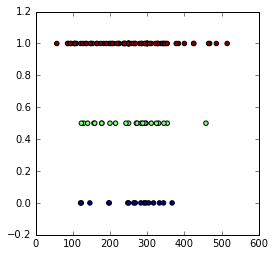

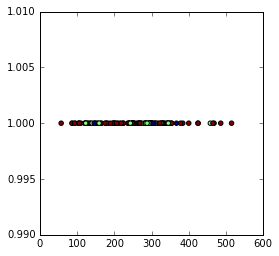

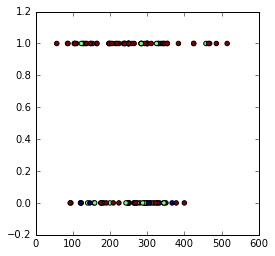

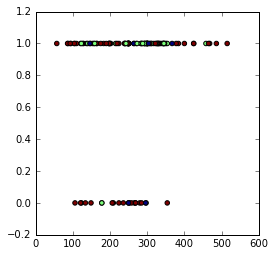

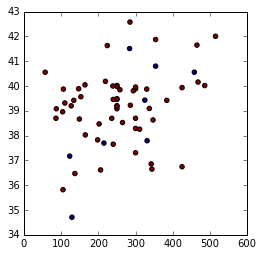

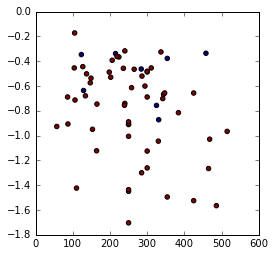

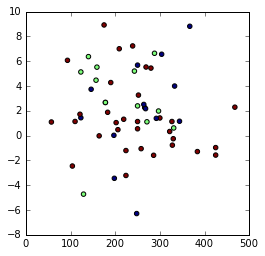

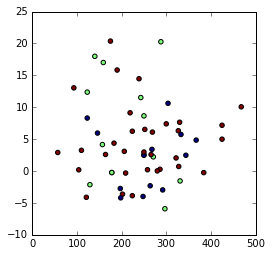

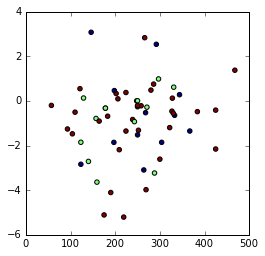

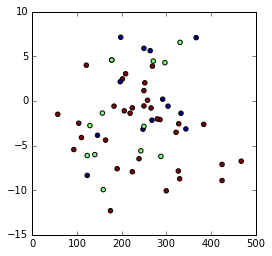

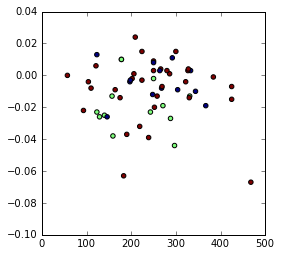

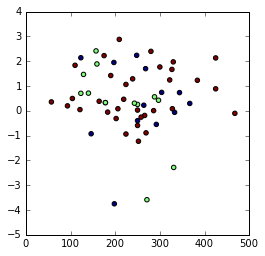

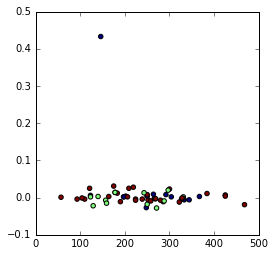

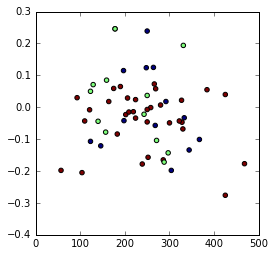

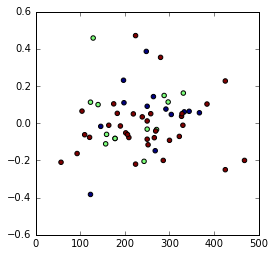

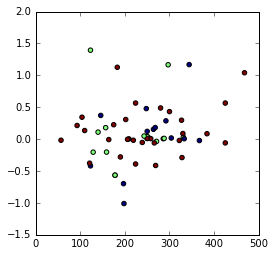

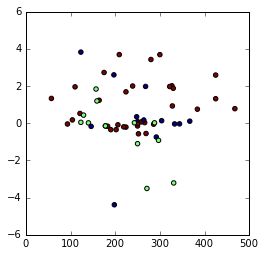

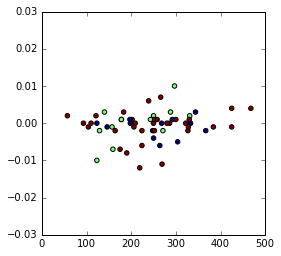

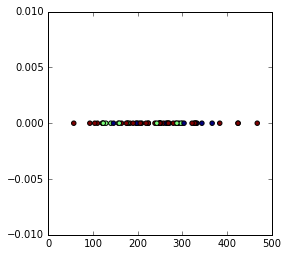

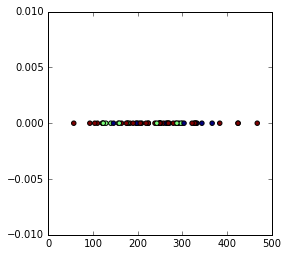

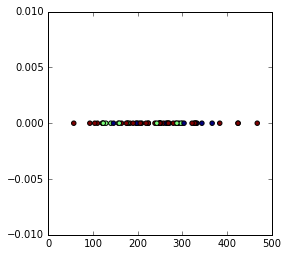

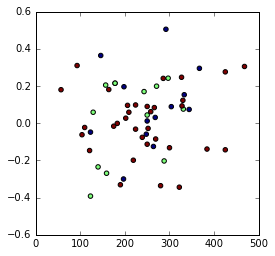

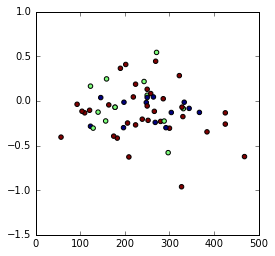

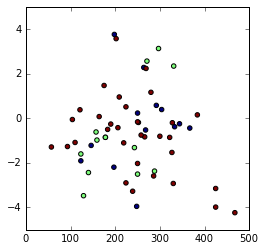

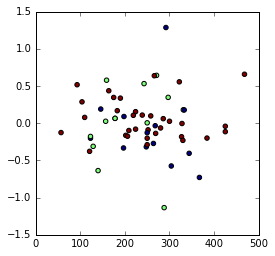

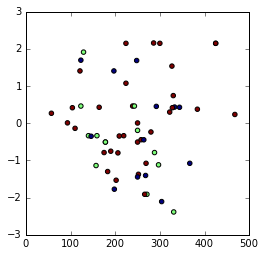

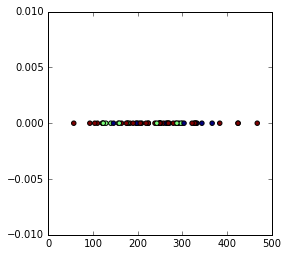

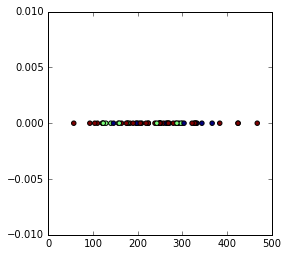

float64


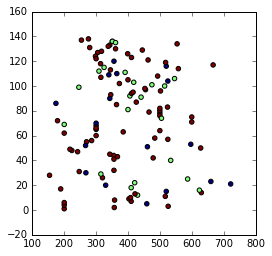

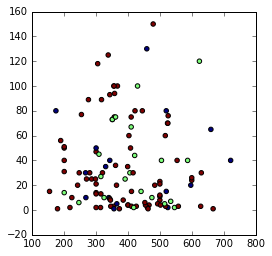

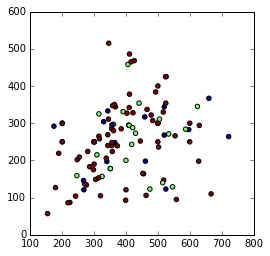

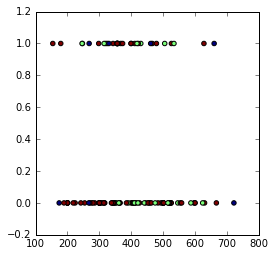

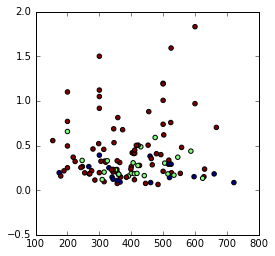

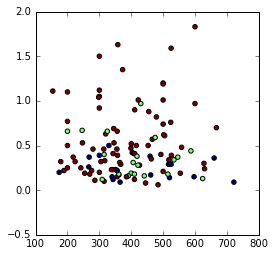

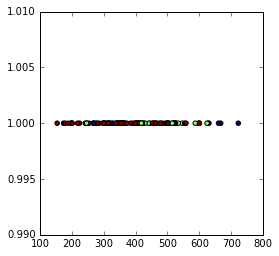

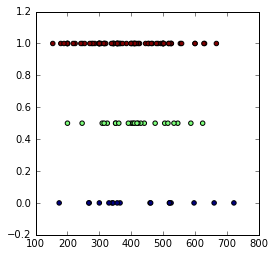

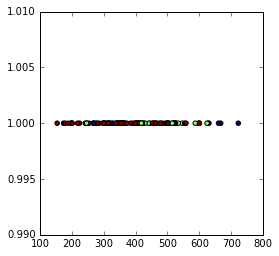

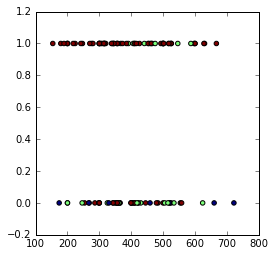

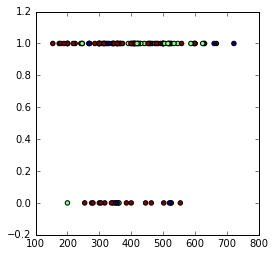

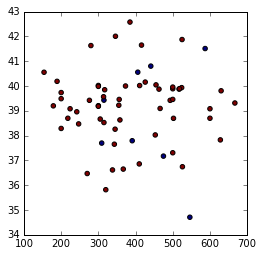

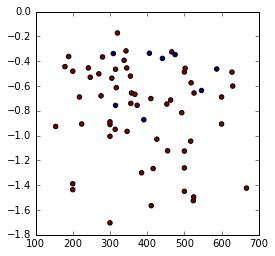

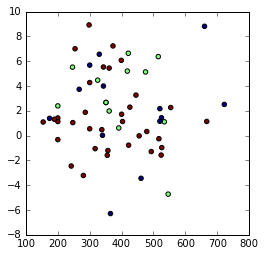

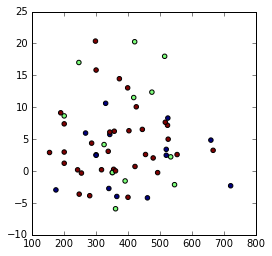

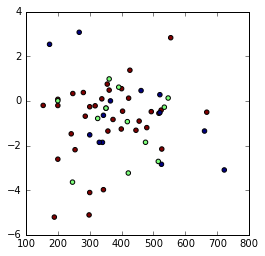

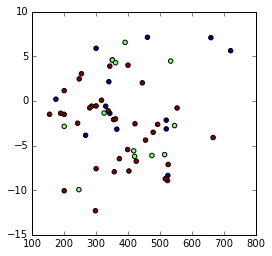

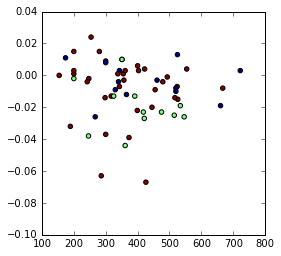

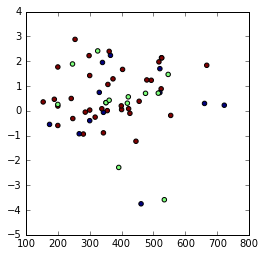

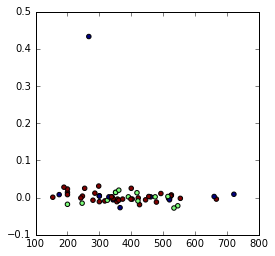

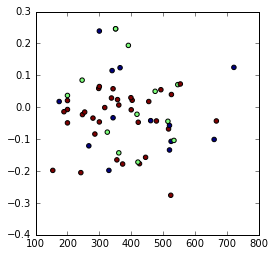

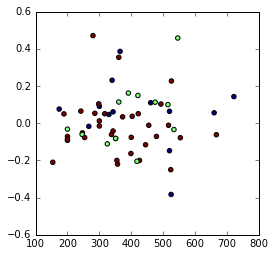

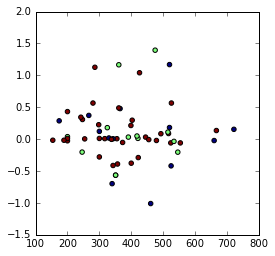

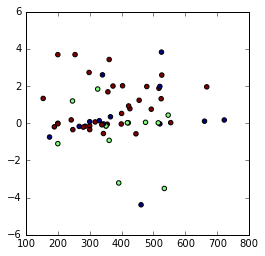

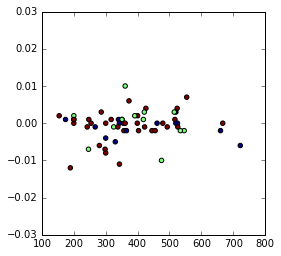

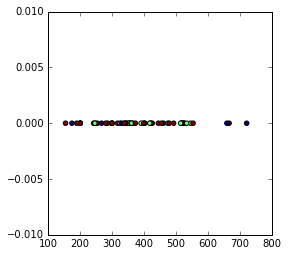

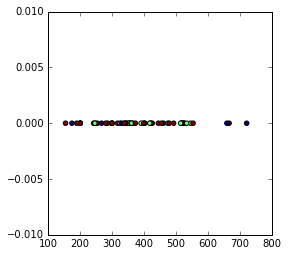

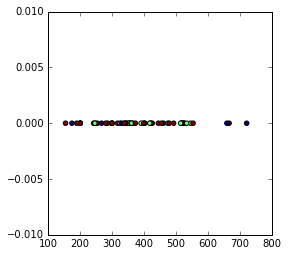

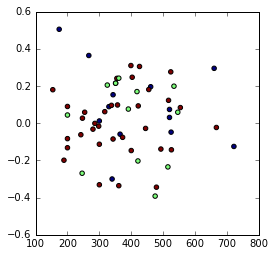

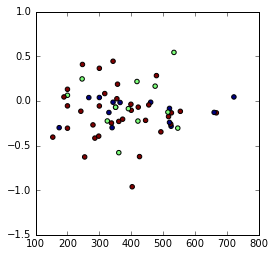

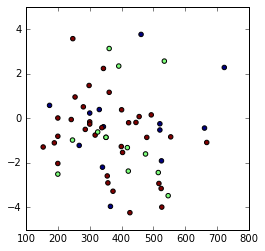

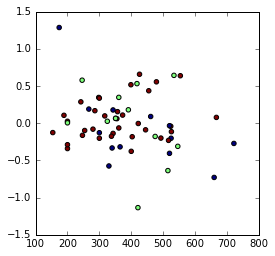

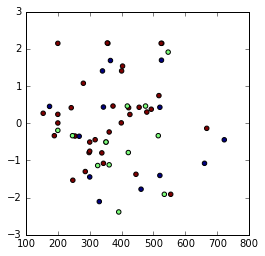

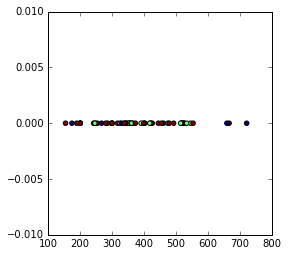

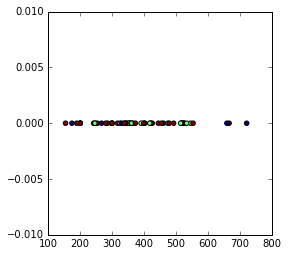

float64


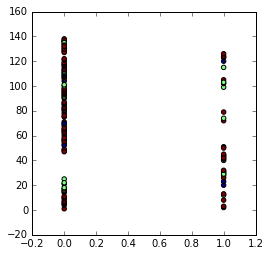

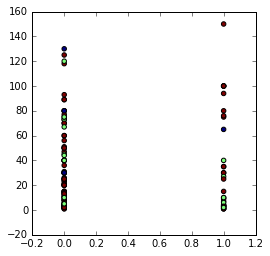

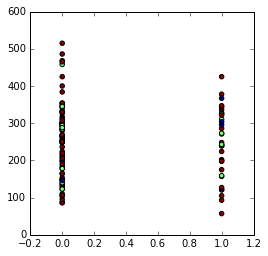

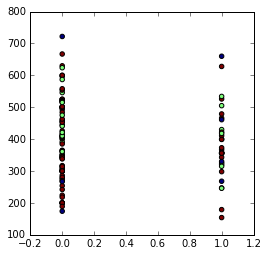

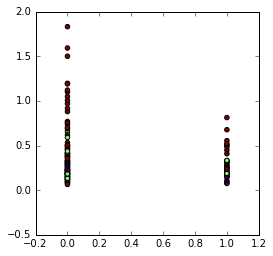

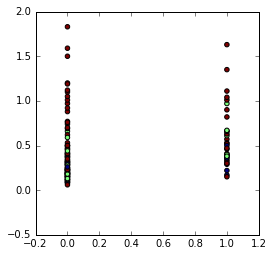

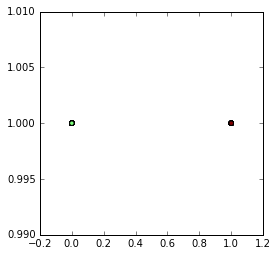

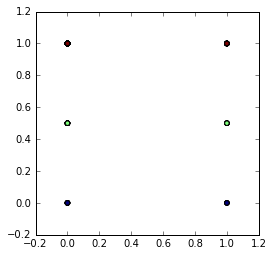

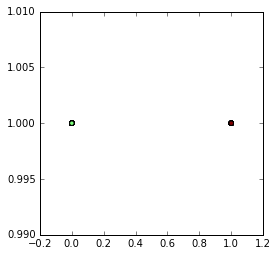

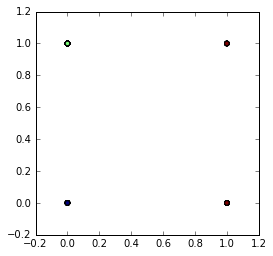

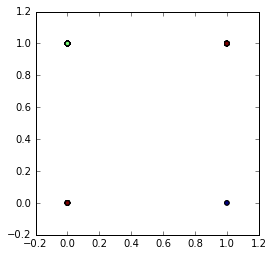

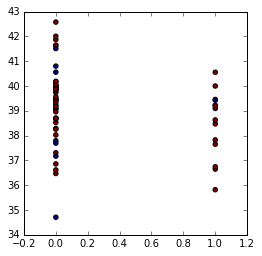

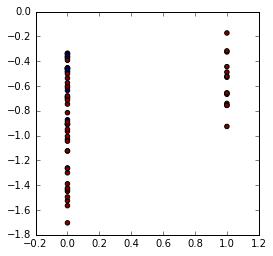

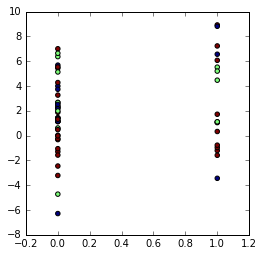

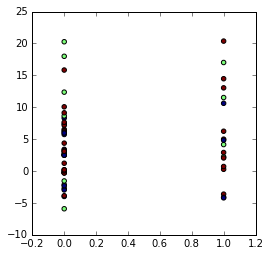

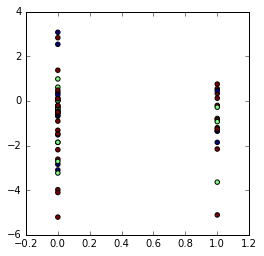

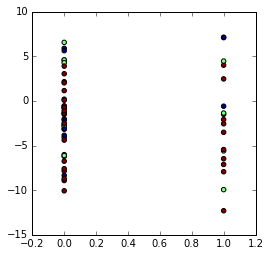

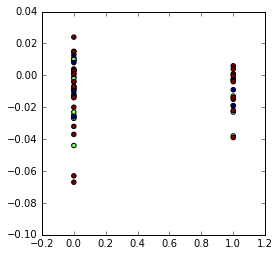

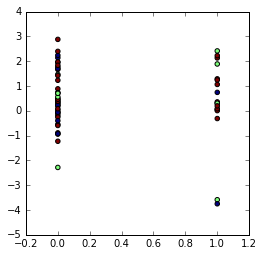

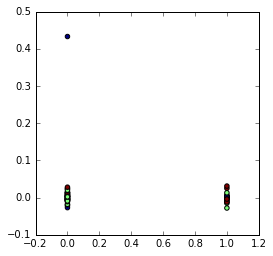

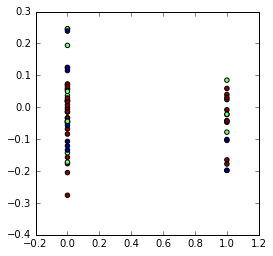

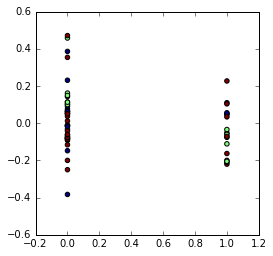

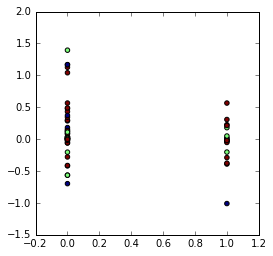

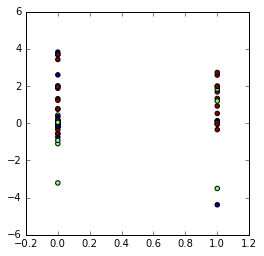

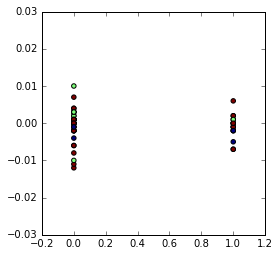

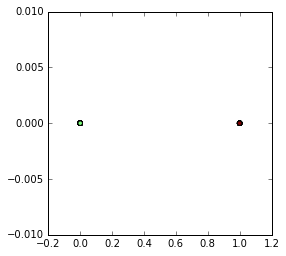

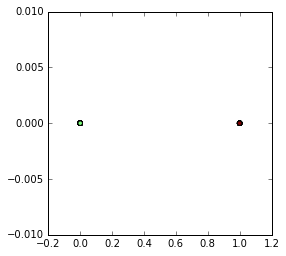

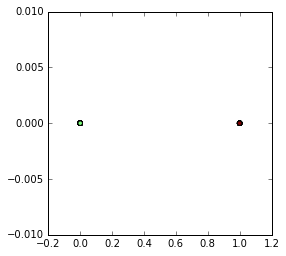

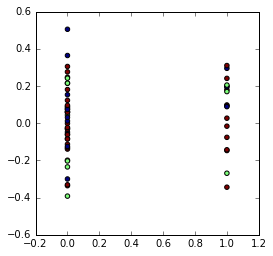

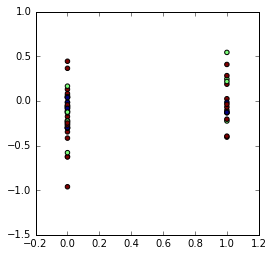

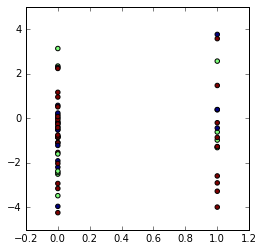

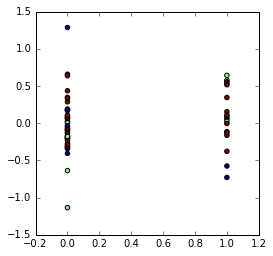

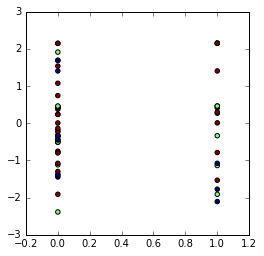

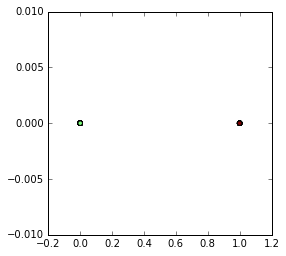

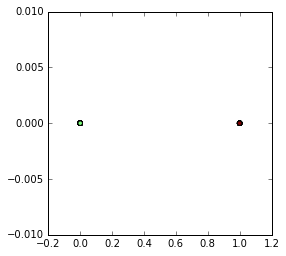

float64


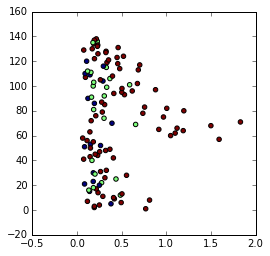

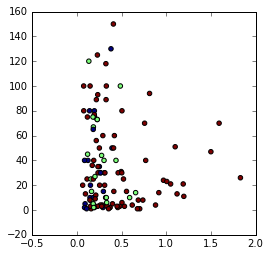

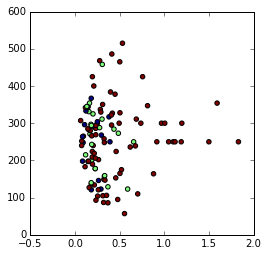

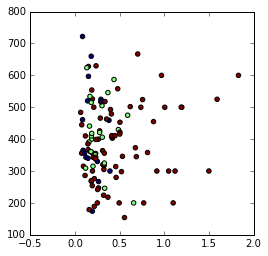

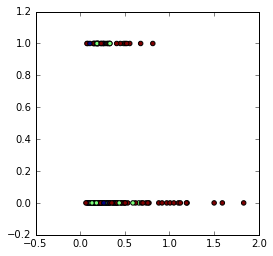

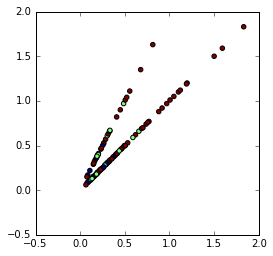

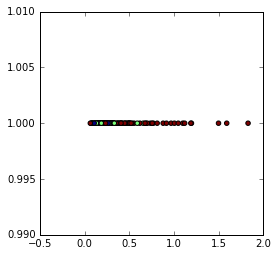

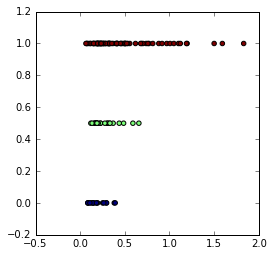

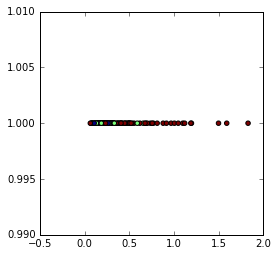

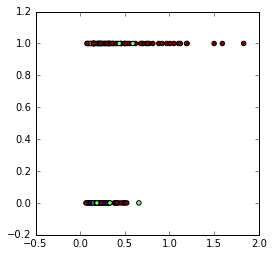

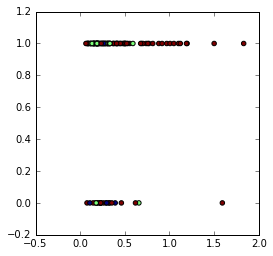

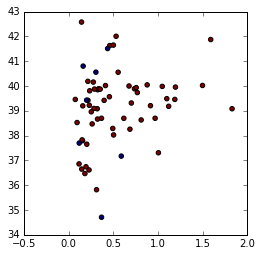

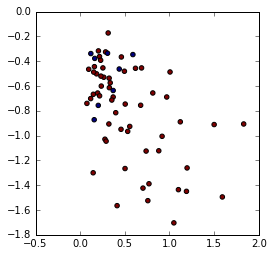

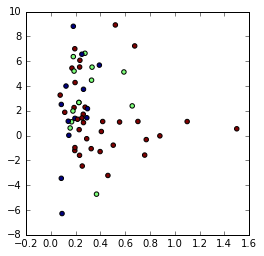

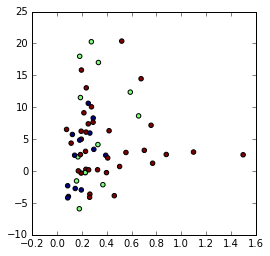

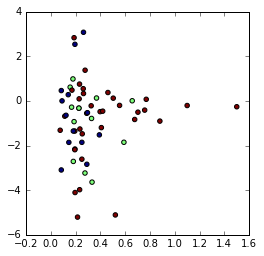

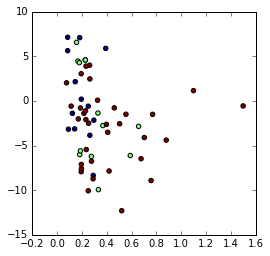

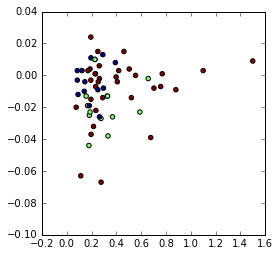

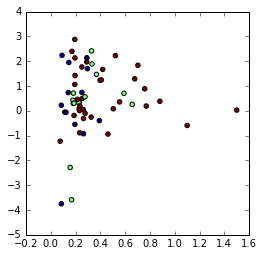

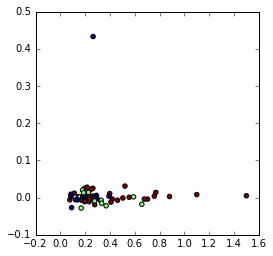

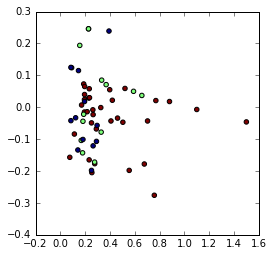

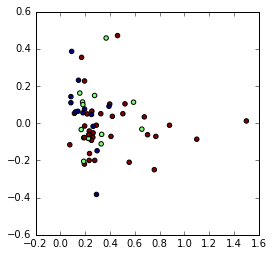

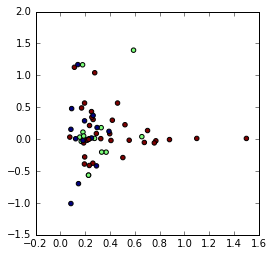

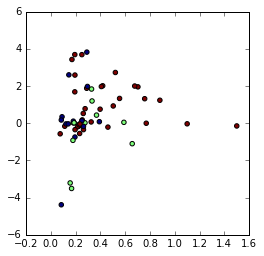

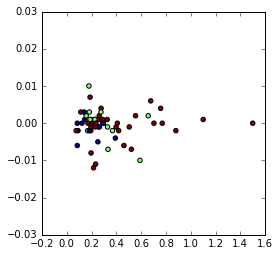

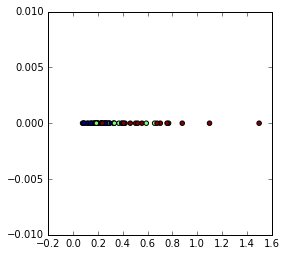

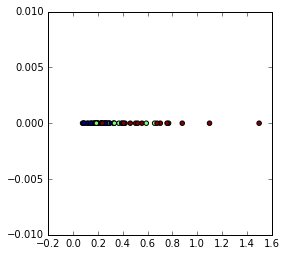

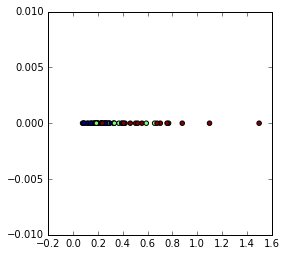

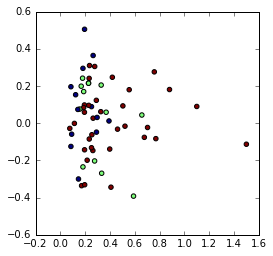

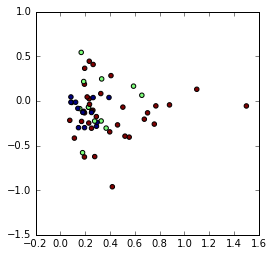

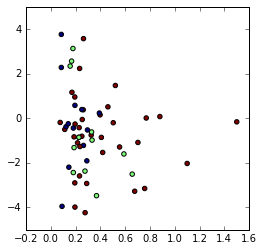

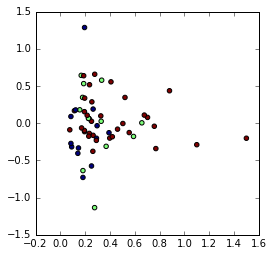

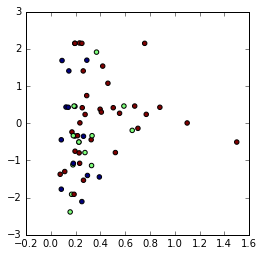

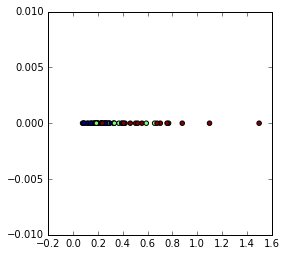

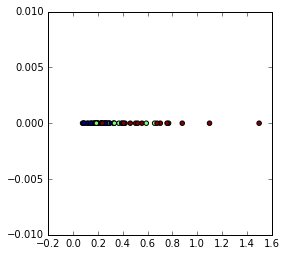

float64


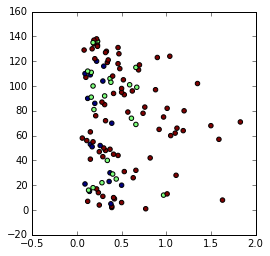

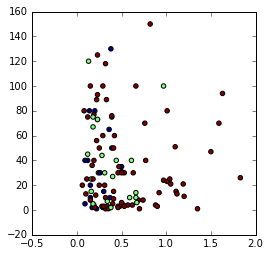

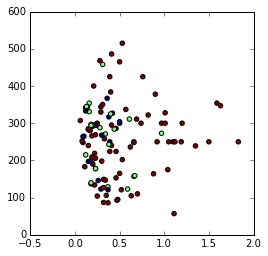

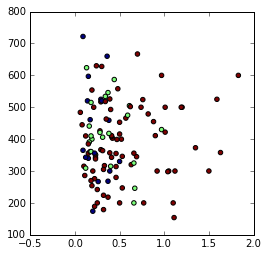

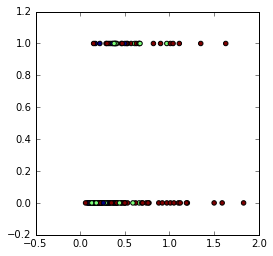

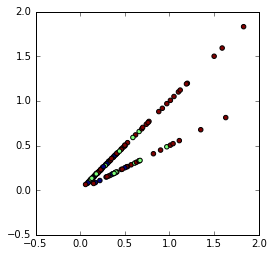

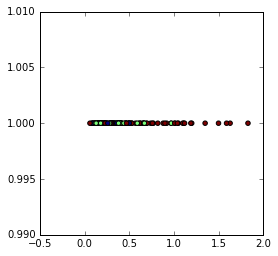

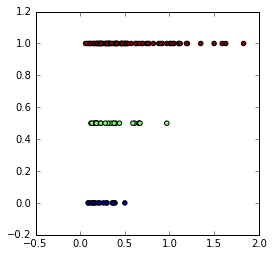

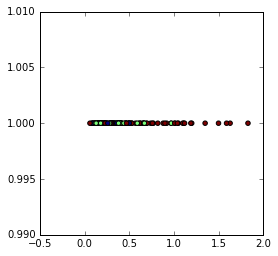

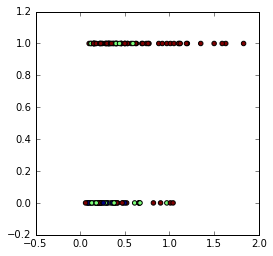

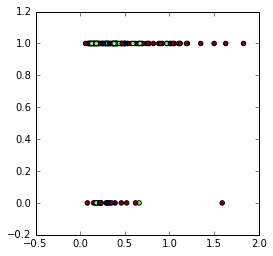

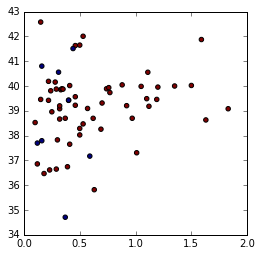

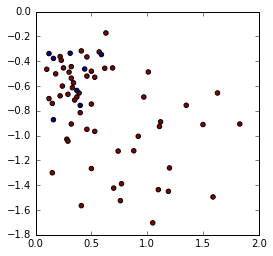

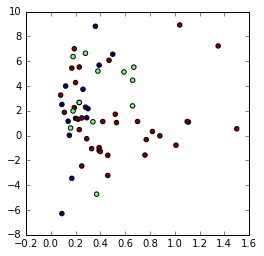

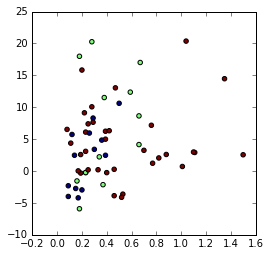

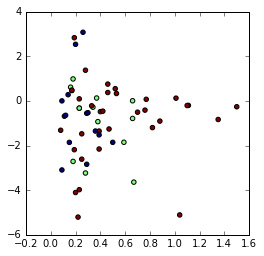

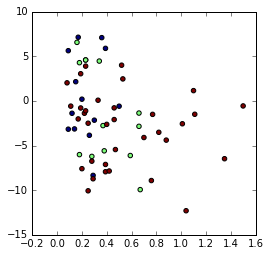

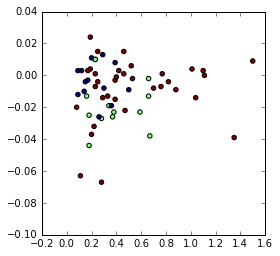

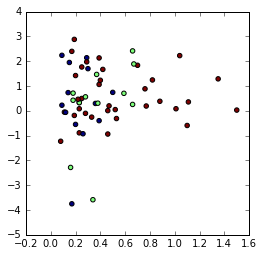

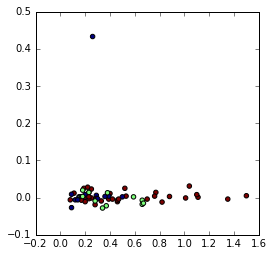

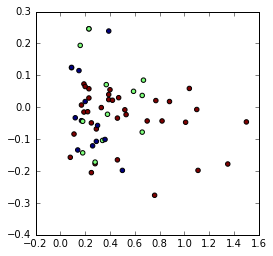

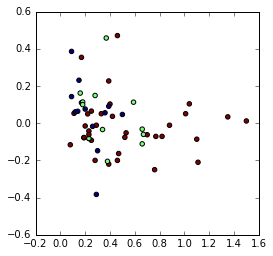

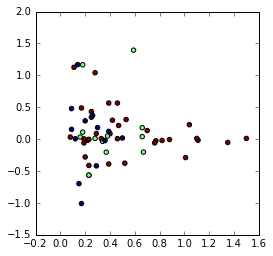

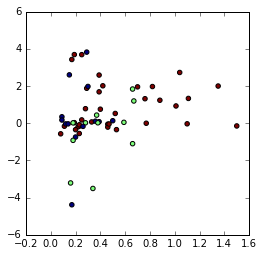

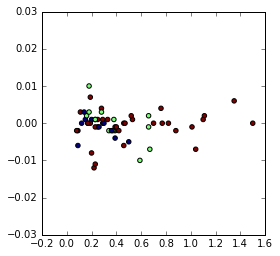

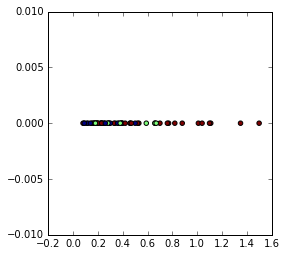

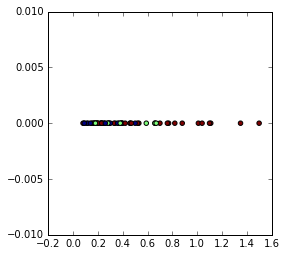

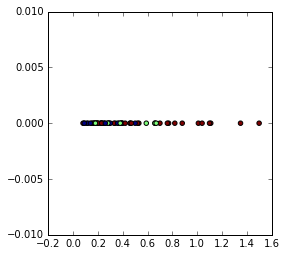

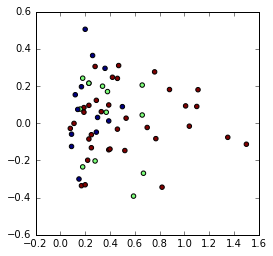

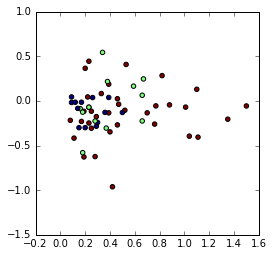

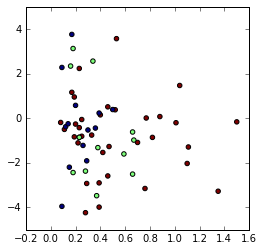

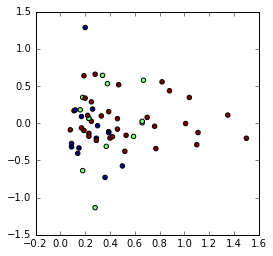

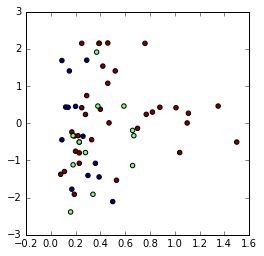

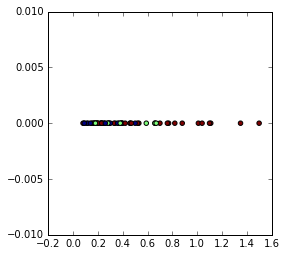

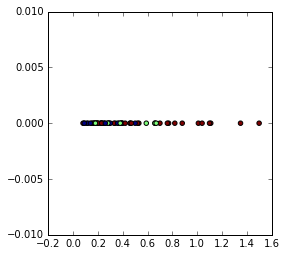

float64


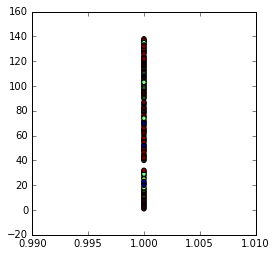

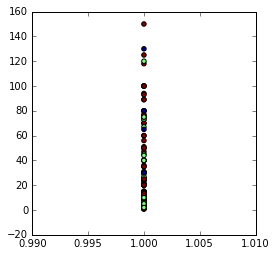

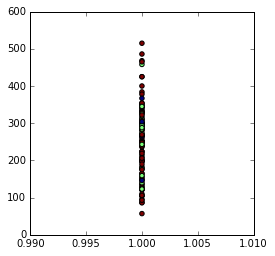

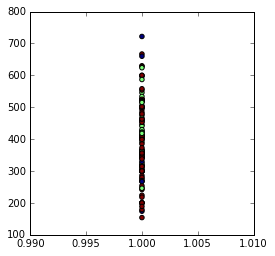

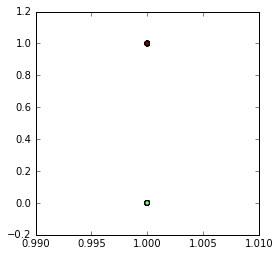

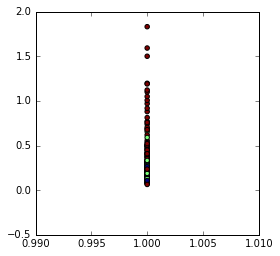

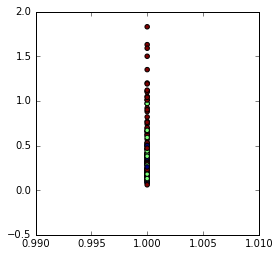

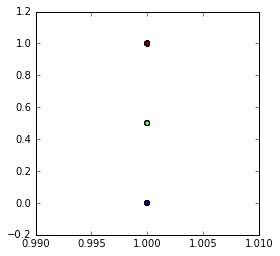

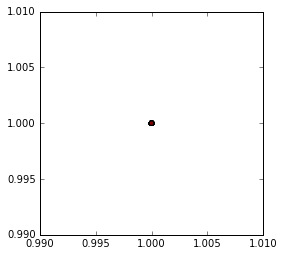

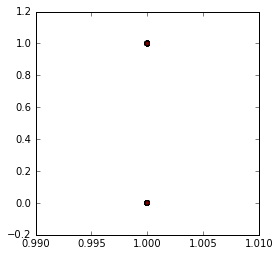

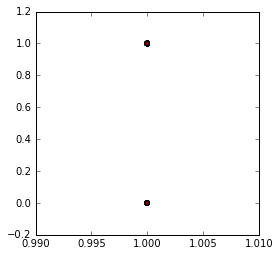

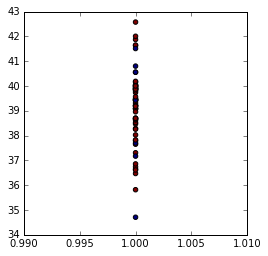

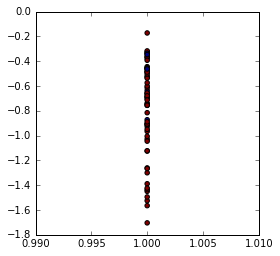

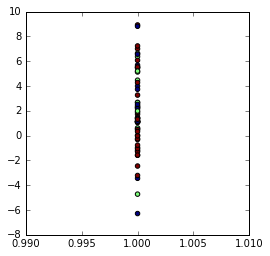

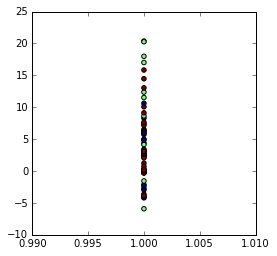

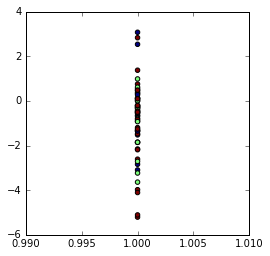

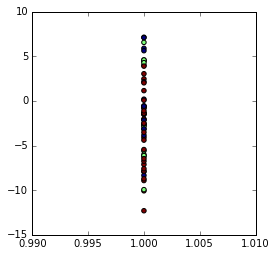

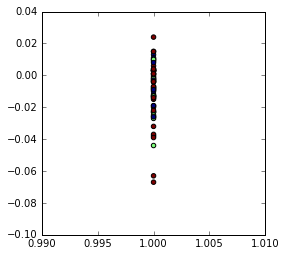

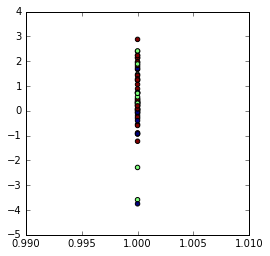

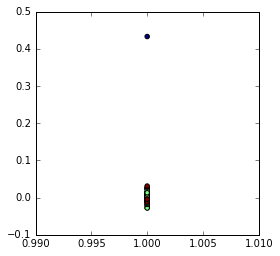

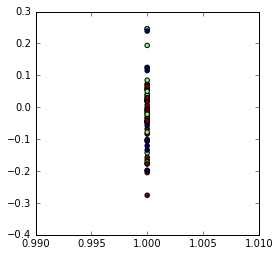

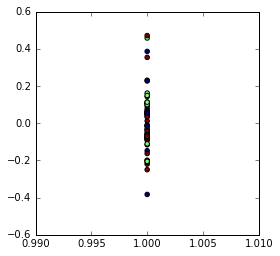

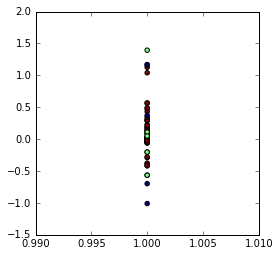

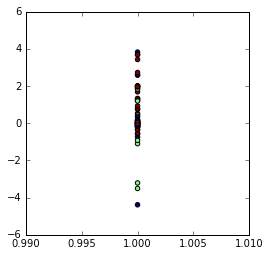

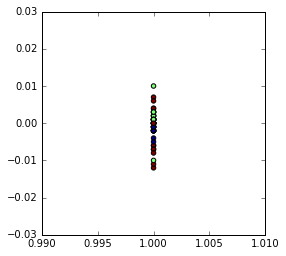

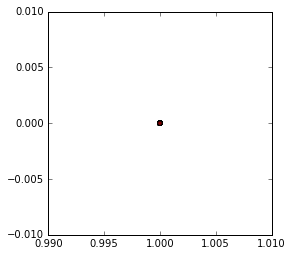

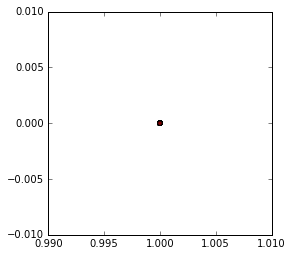

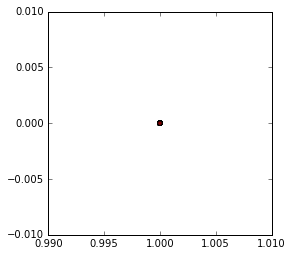

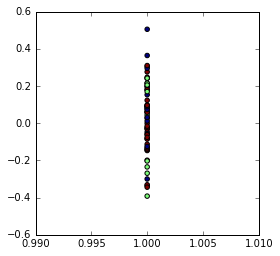

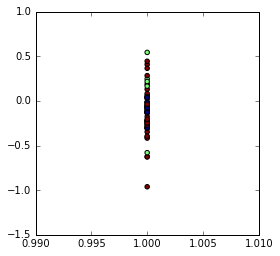

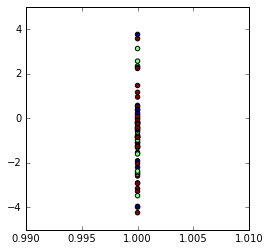

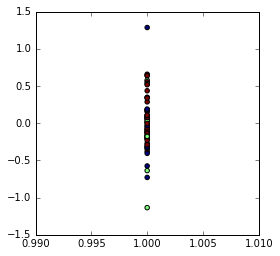

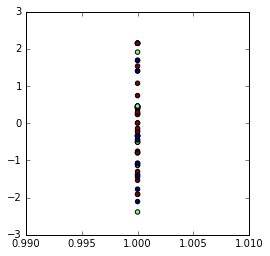

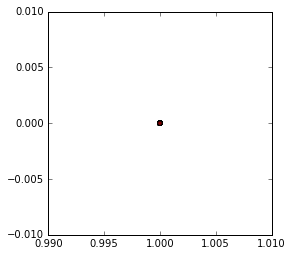

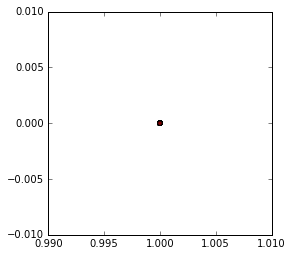

float64


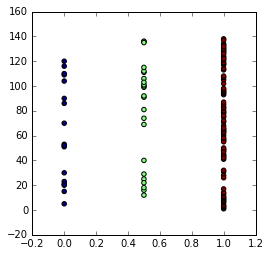

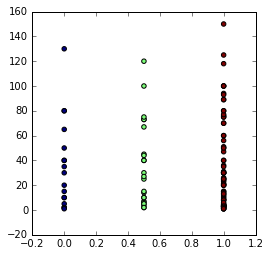

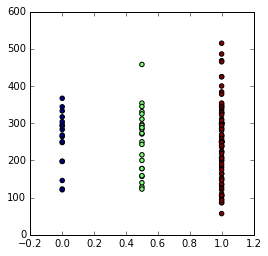

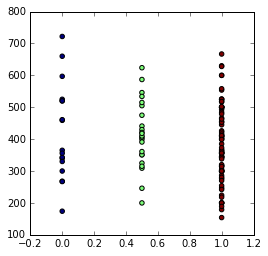

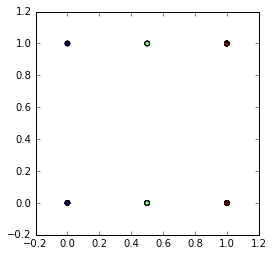

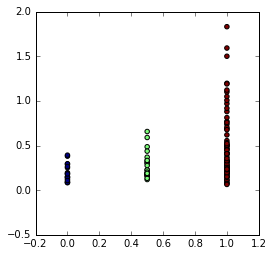

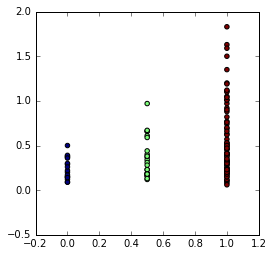

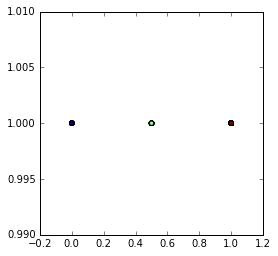

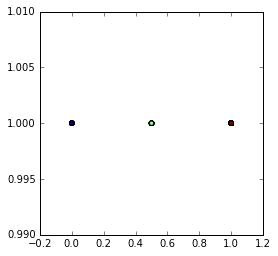

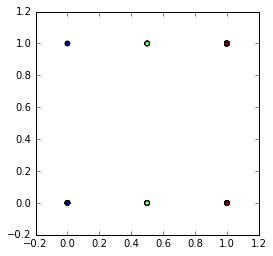

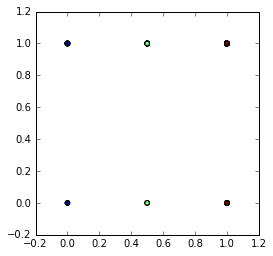

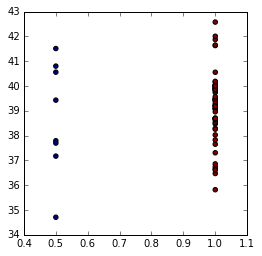

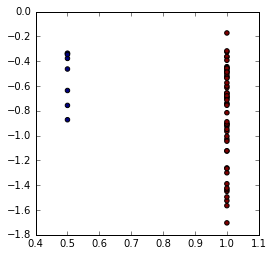

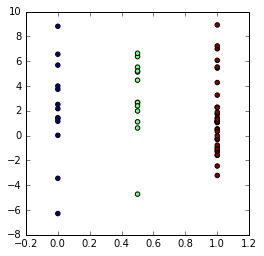

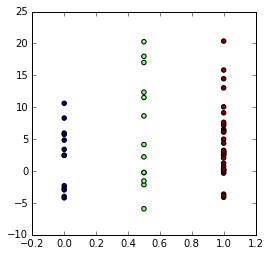

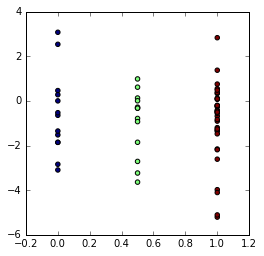

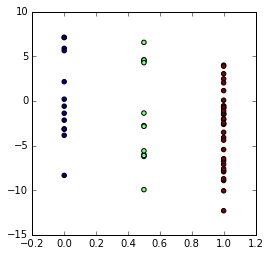

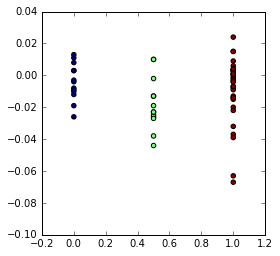

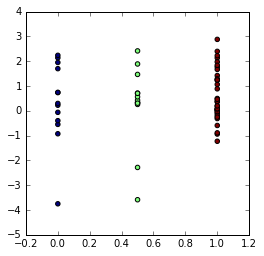

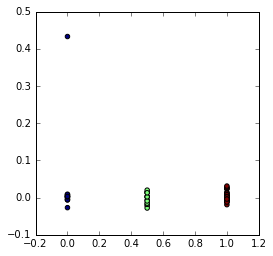

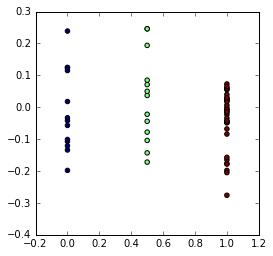

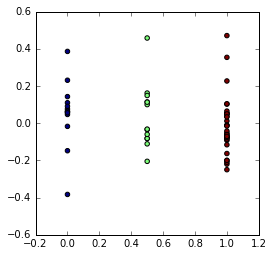

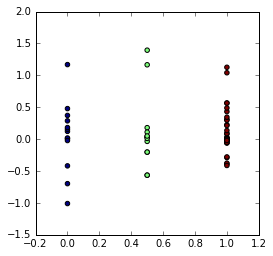

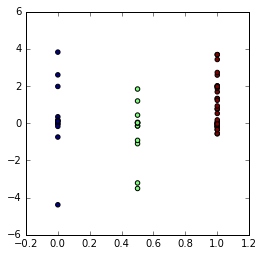

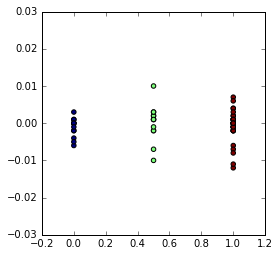

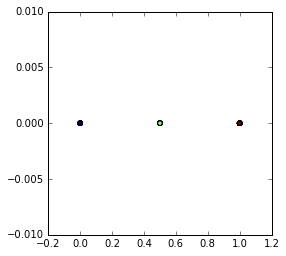

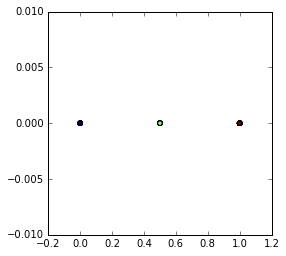

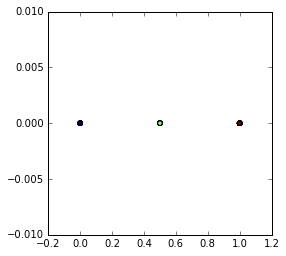

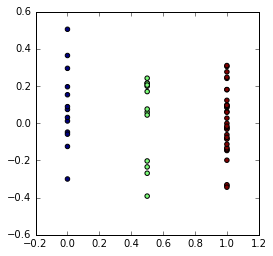

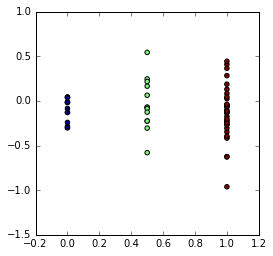

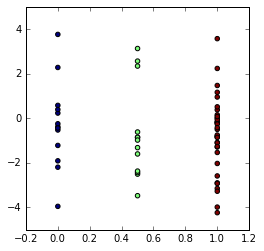

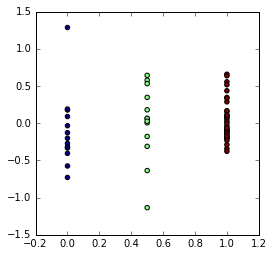

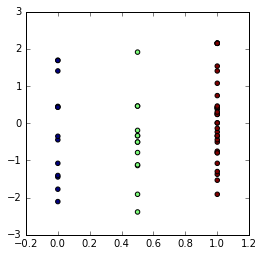

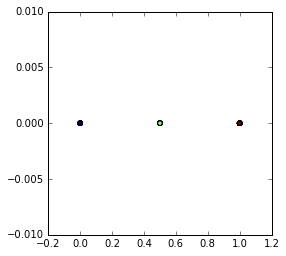

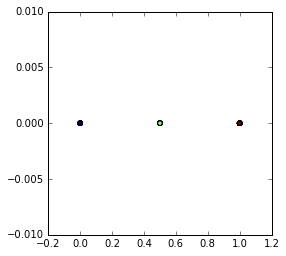

float64


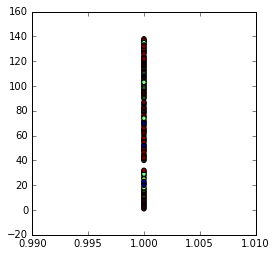

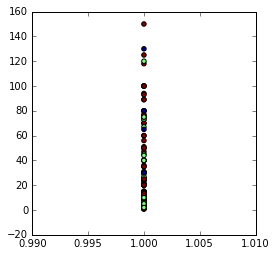

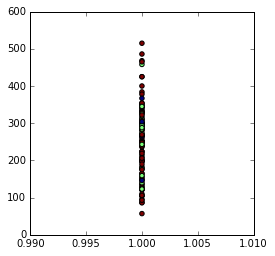

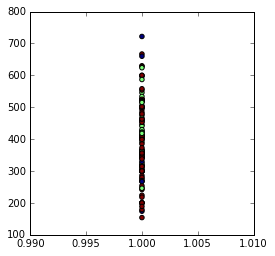

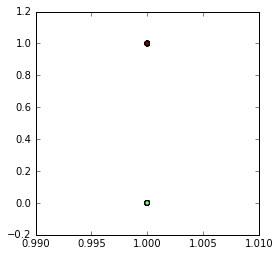

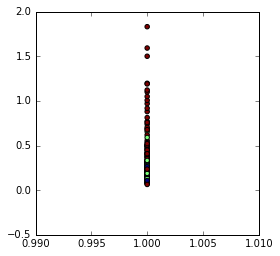

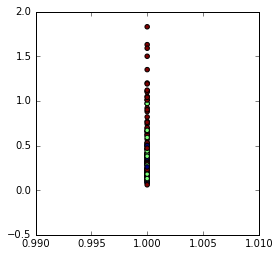

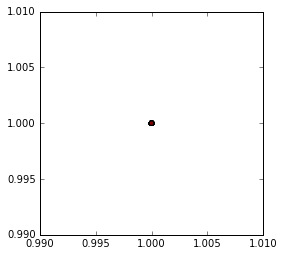

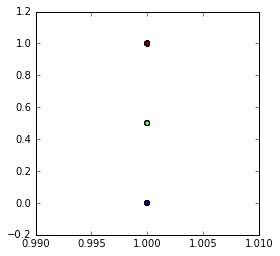

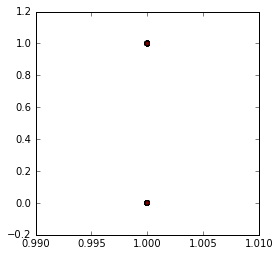

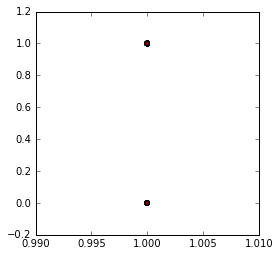

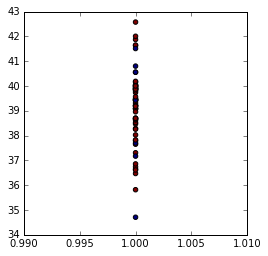

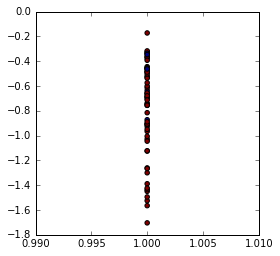

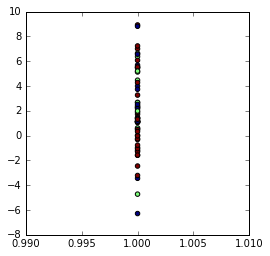

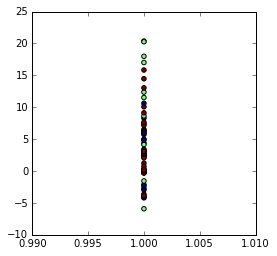

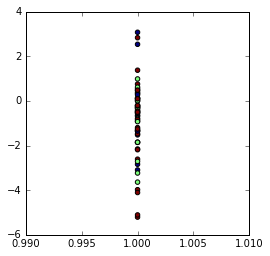

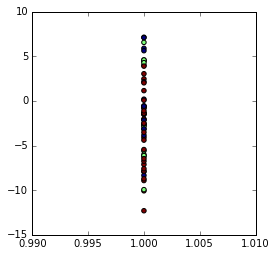

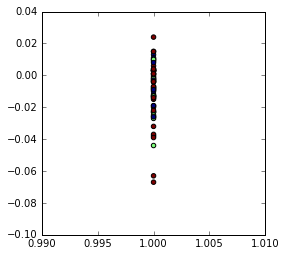

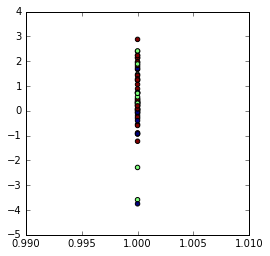

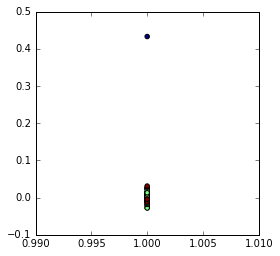

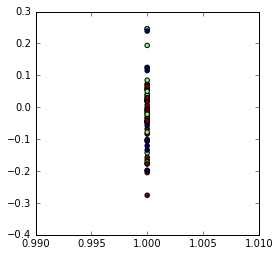

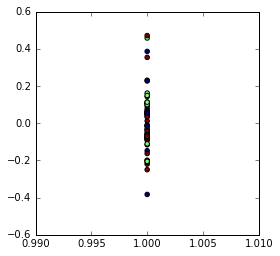

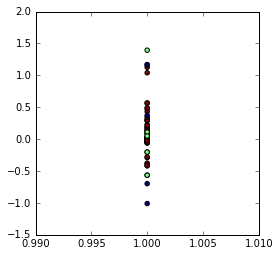

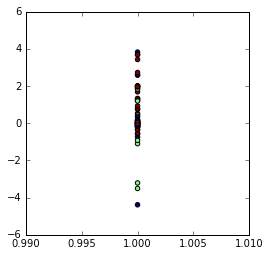

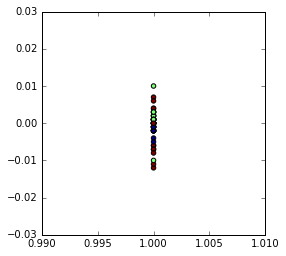

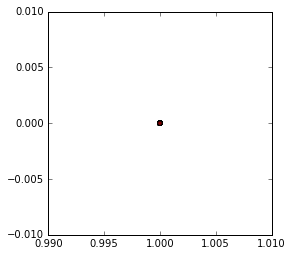

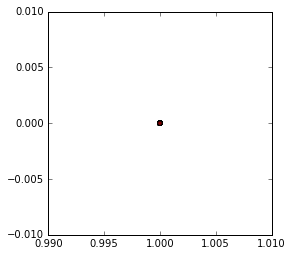

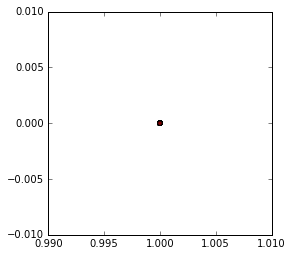

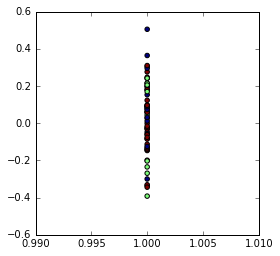

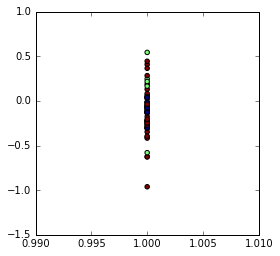

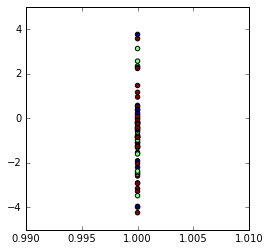

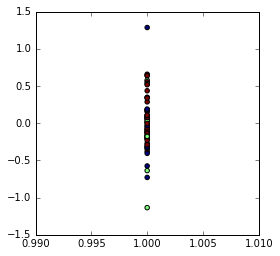

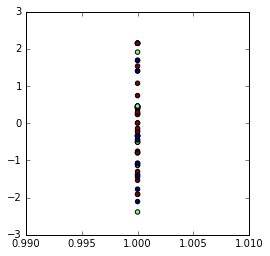

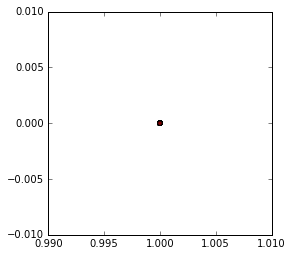

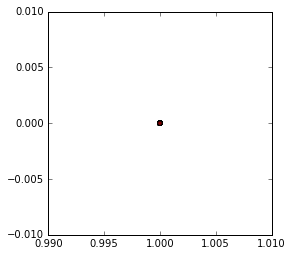

float64


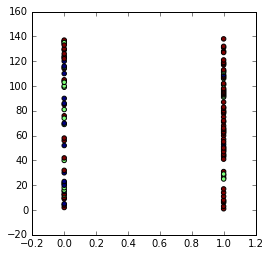

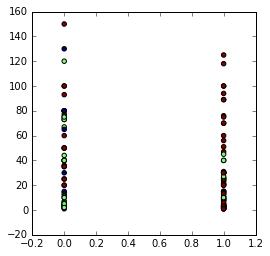

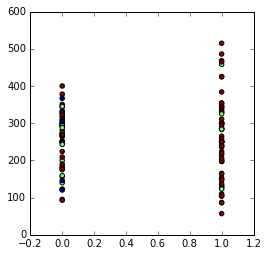

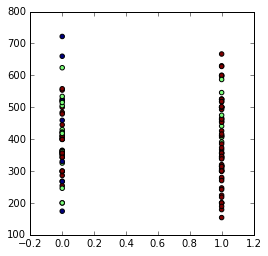

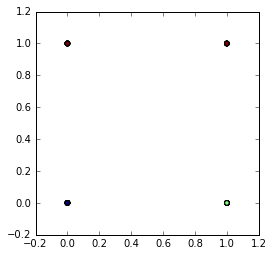

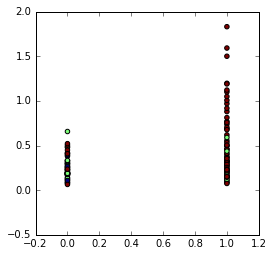

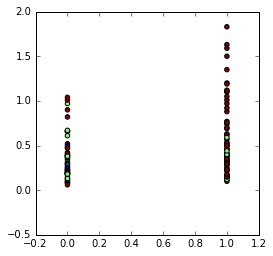

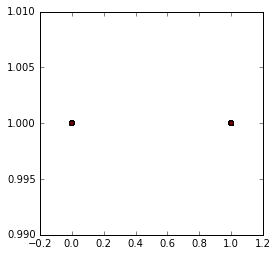

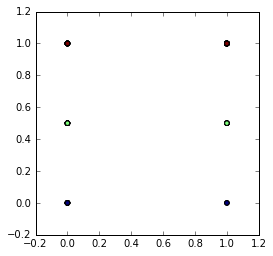

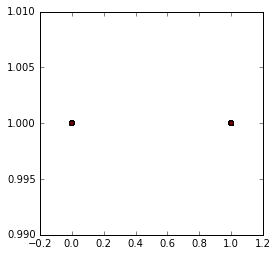

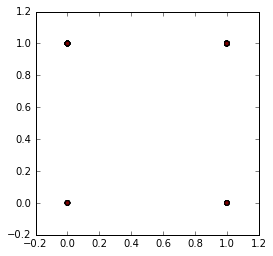

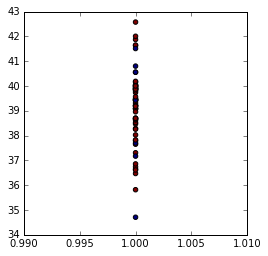

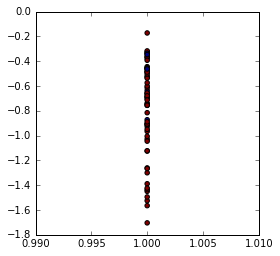

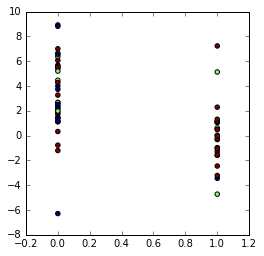

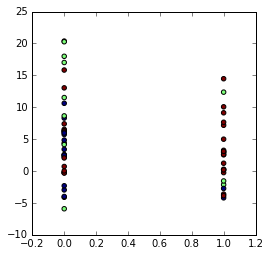

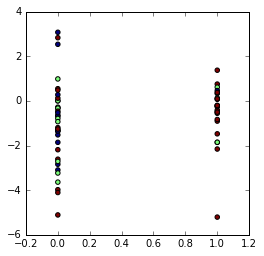

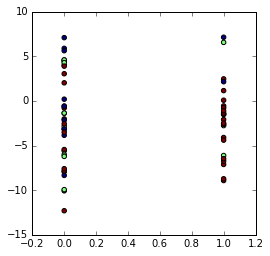

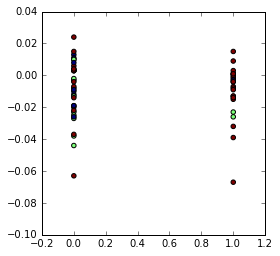

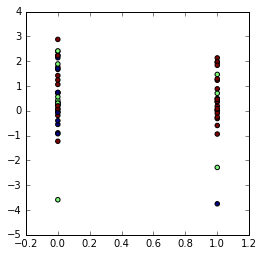

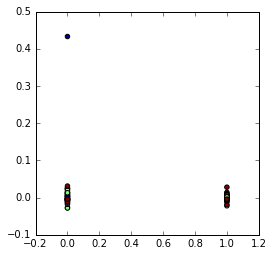

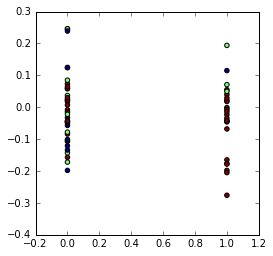

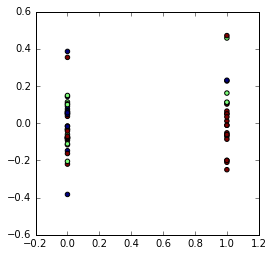

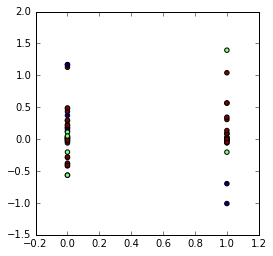

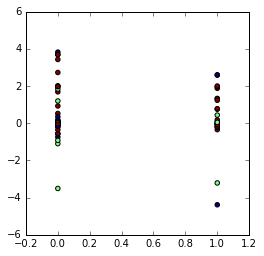

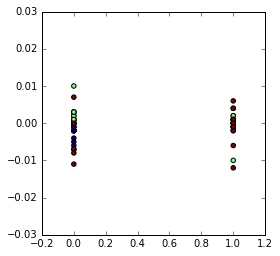

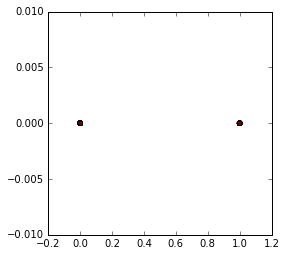

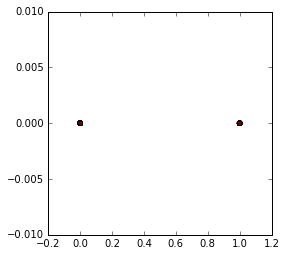

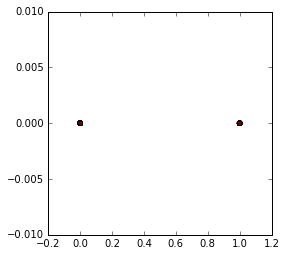

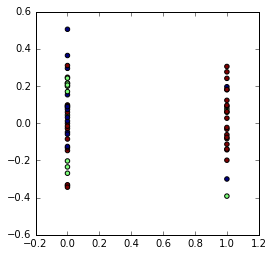

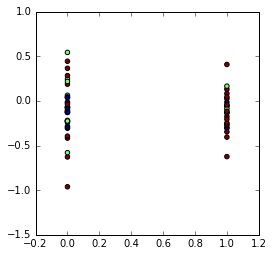

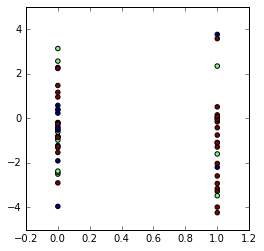

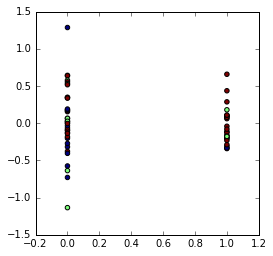

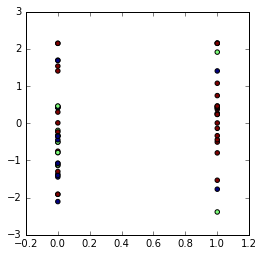

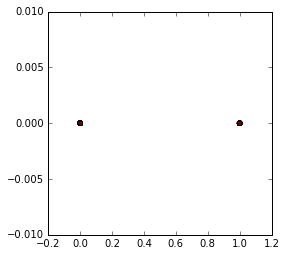

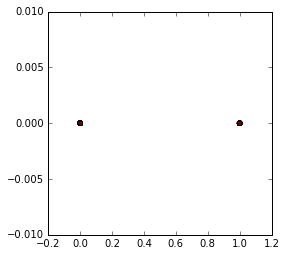

float64


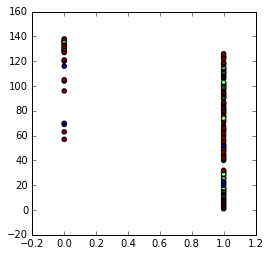

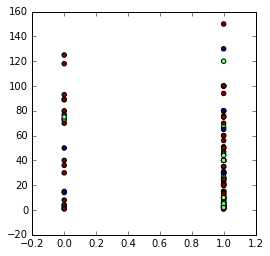

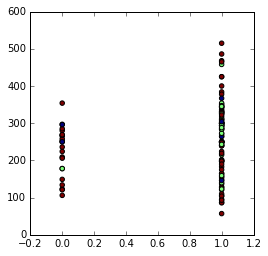

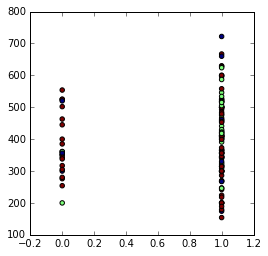

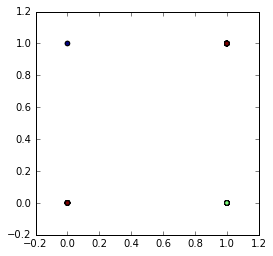

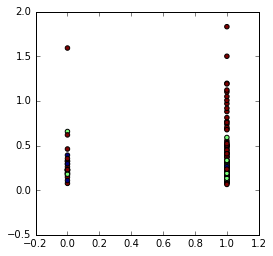

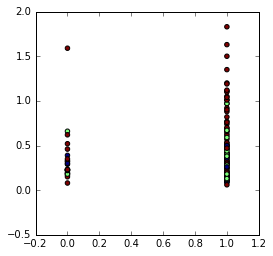

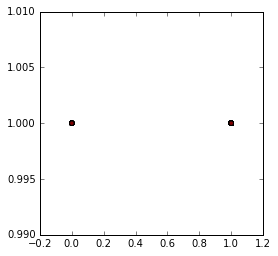

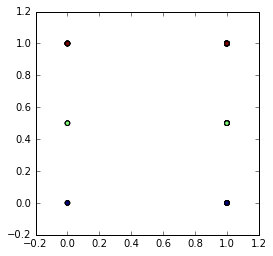

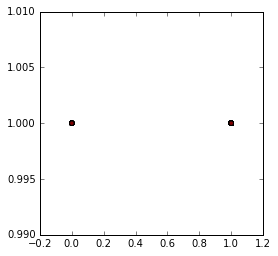

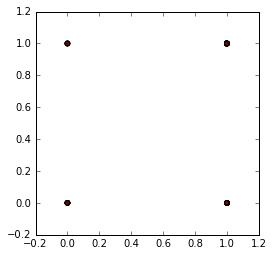

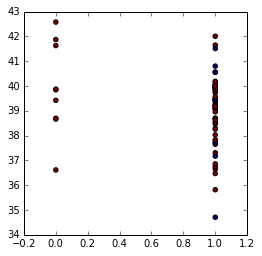

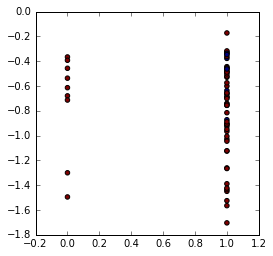

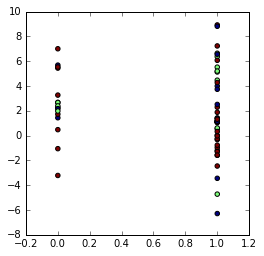

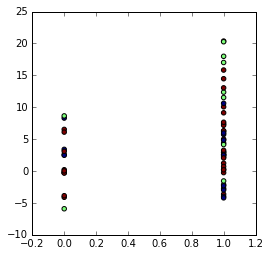

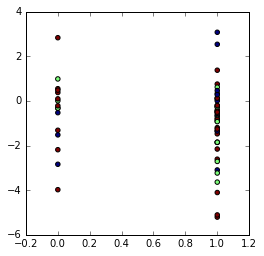

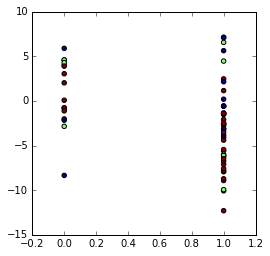

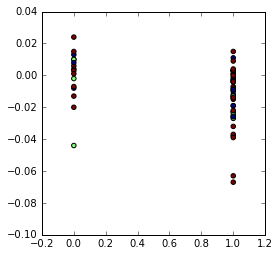

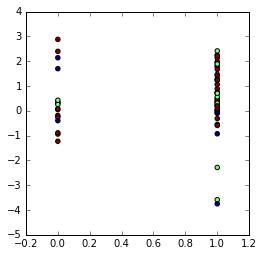

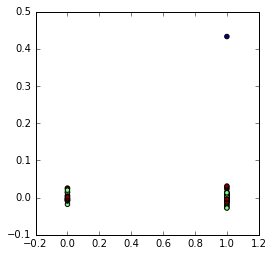

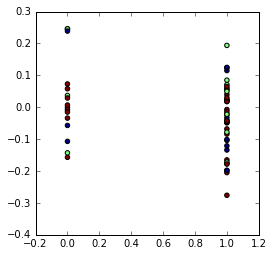

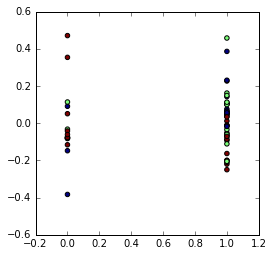

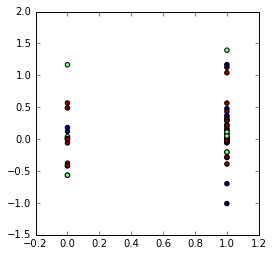

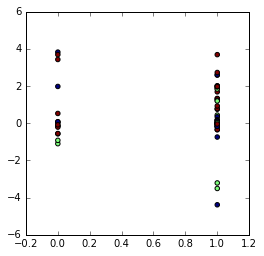

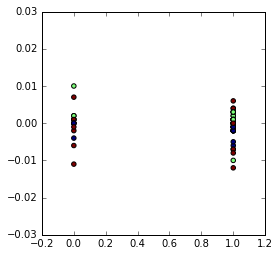

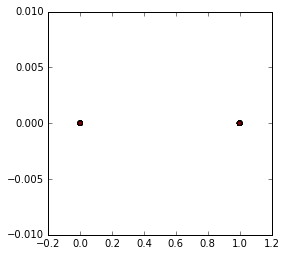

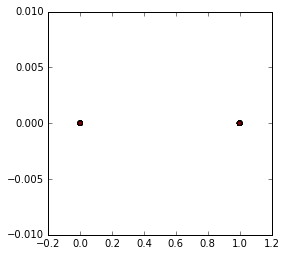

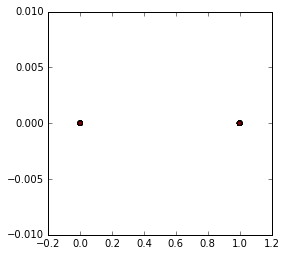

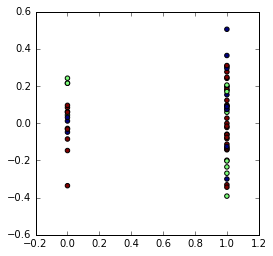

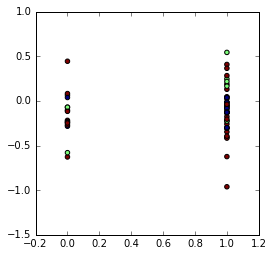

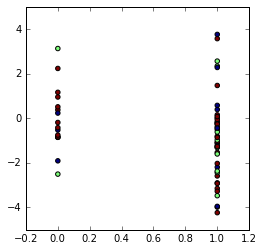

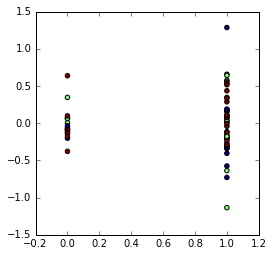

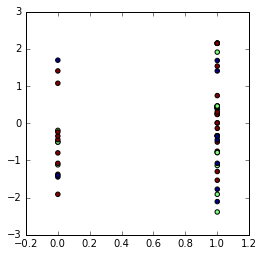

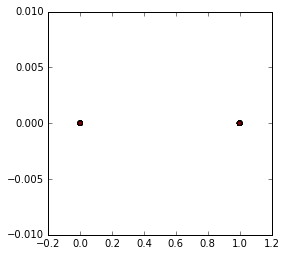

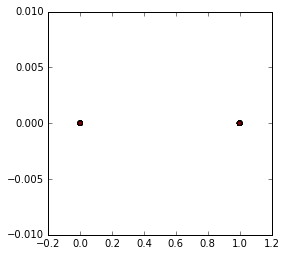

float64


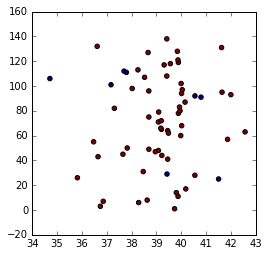

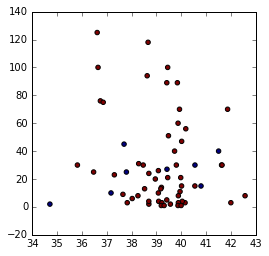

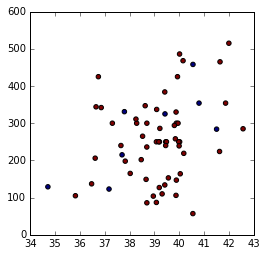

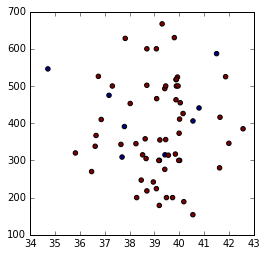

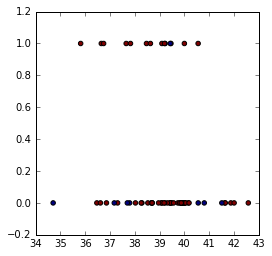

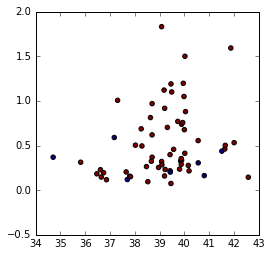

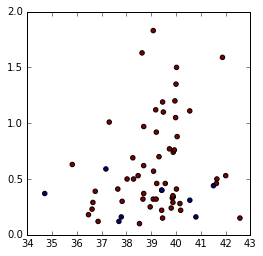

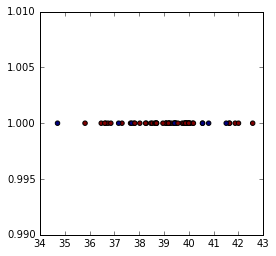

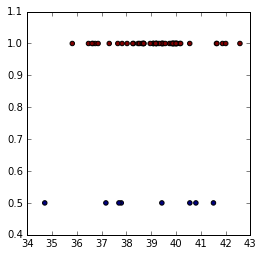

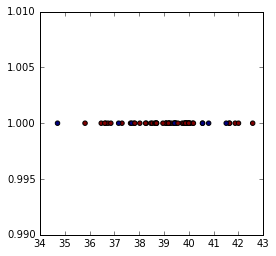

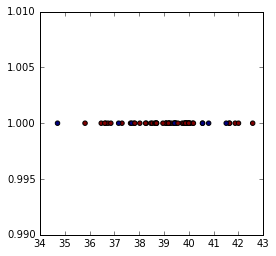

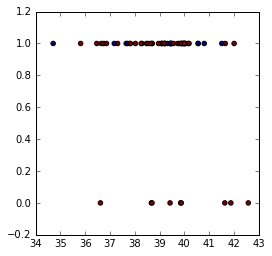

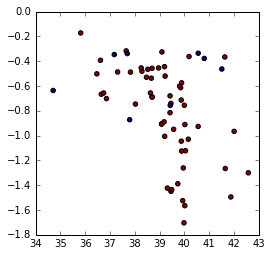

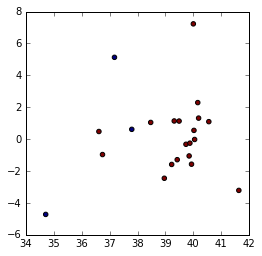

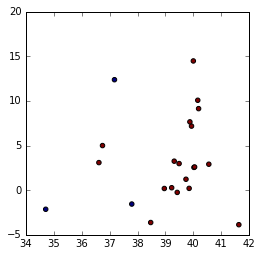

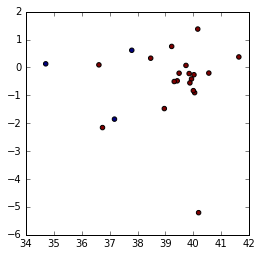

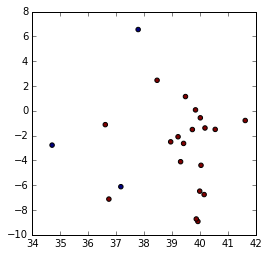

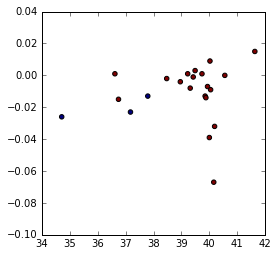

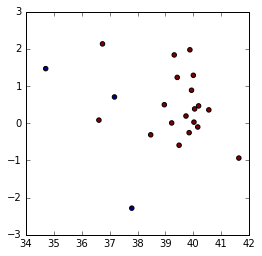

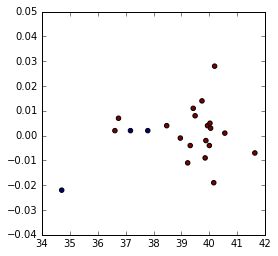

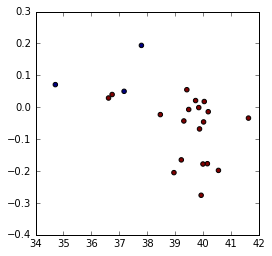

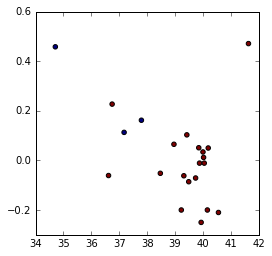

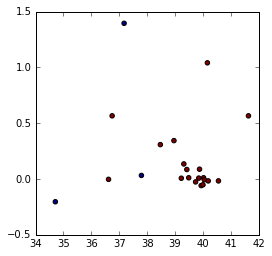

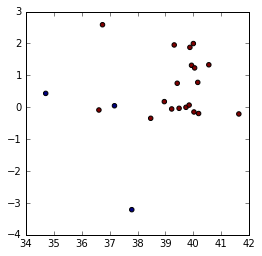

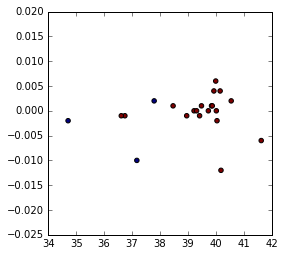

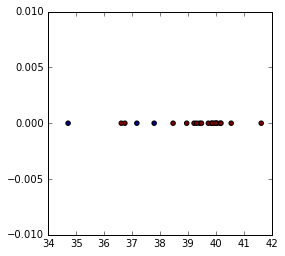

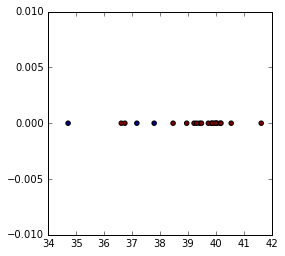

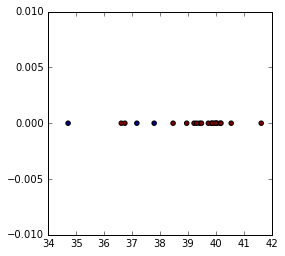

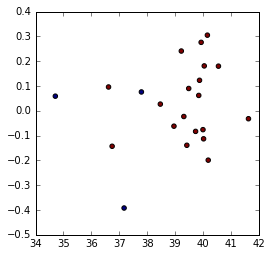

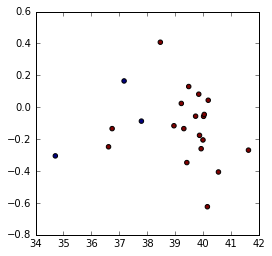

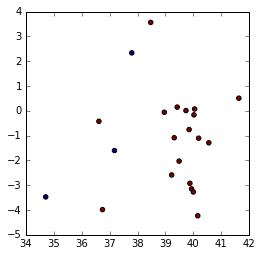

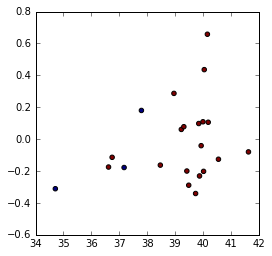

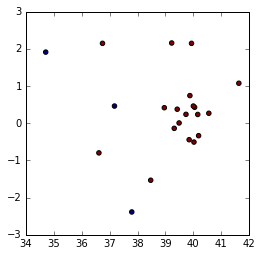

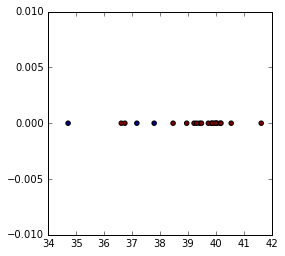

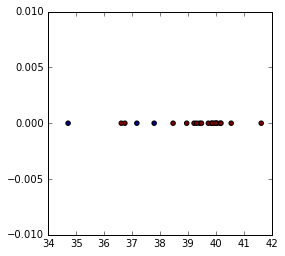

float64


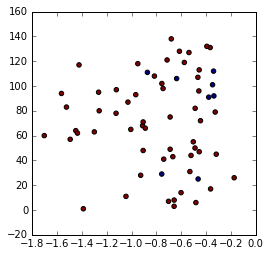

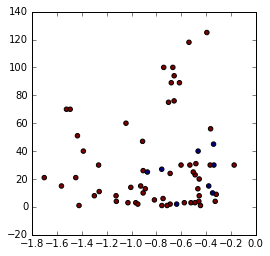

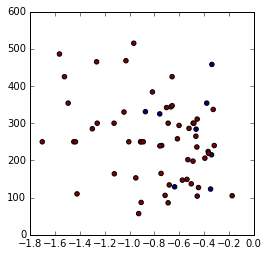

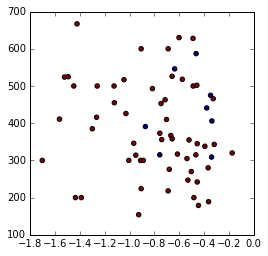

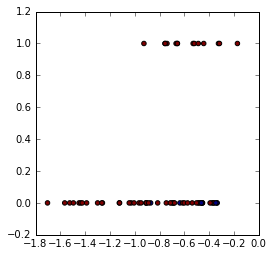

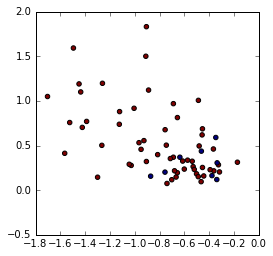

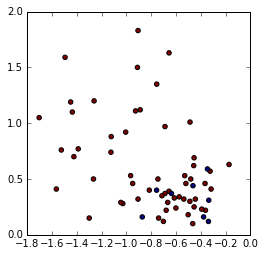

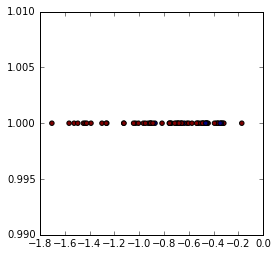

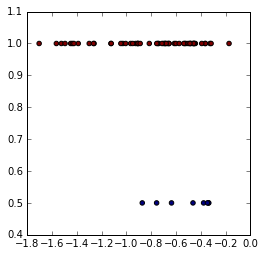

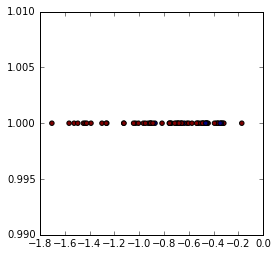

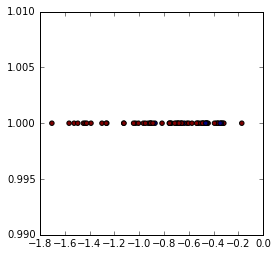

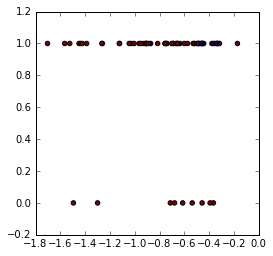

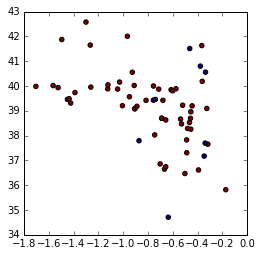

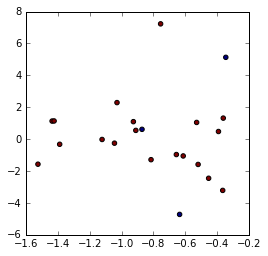

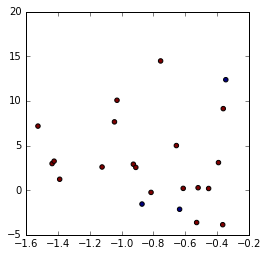

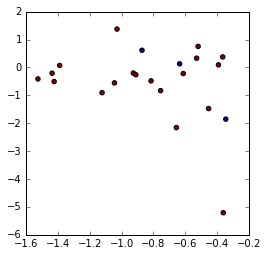

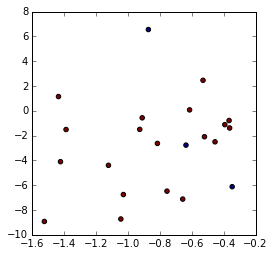

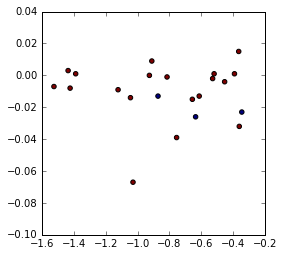

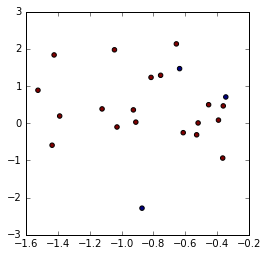

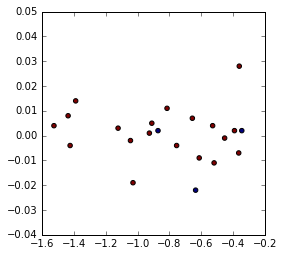

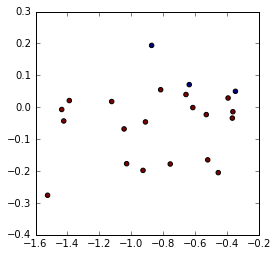

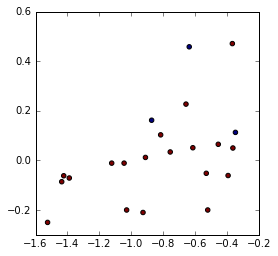

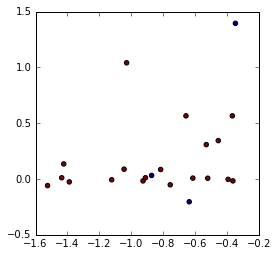

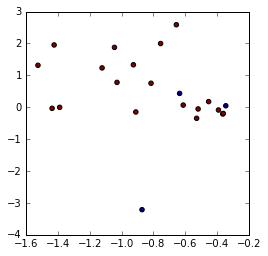

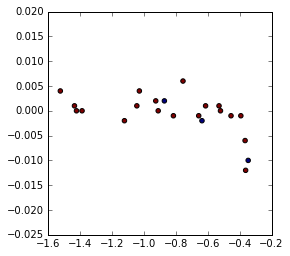

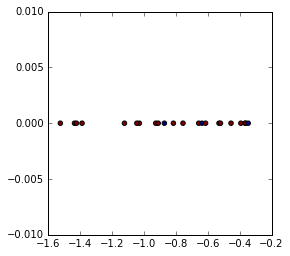

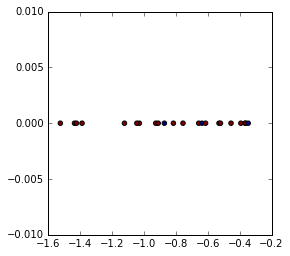

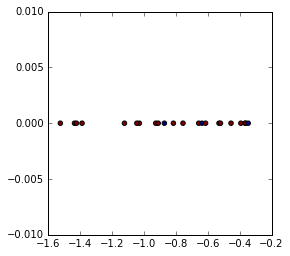

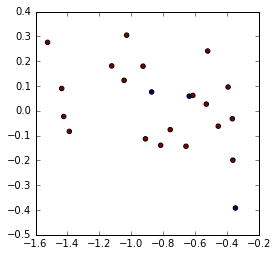

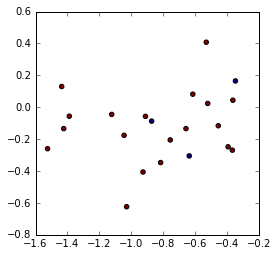

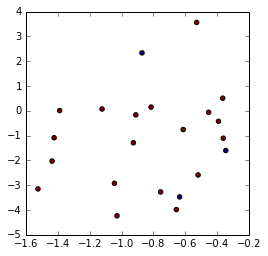

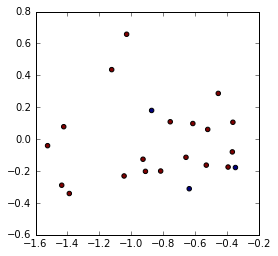

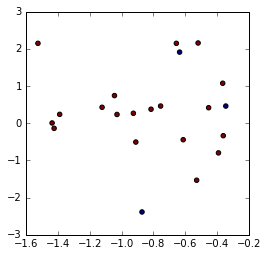

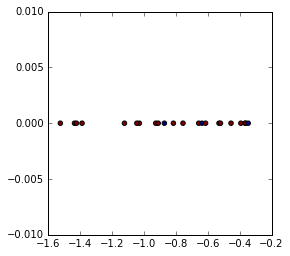

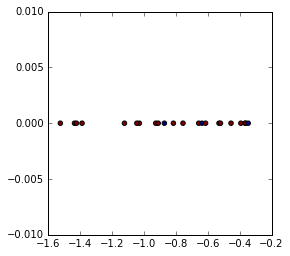

float64


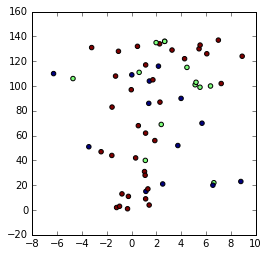

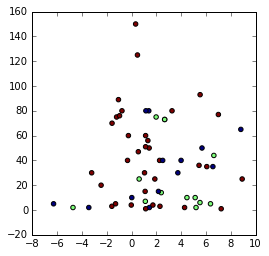

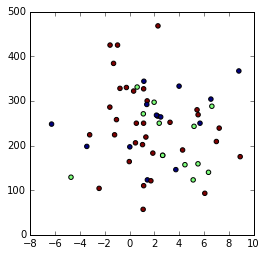

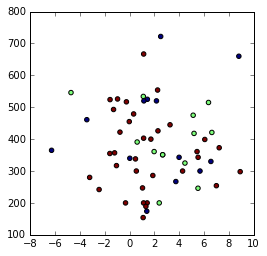

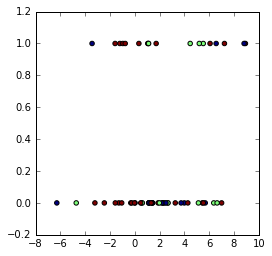

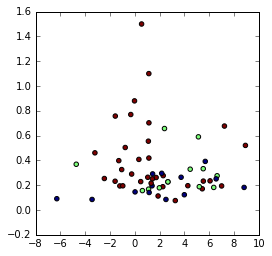

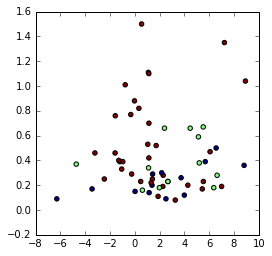

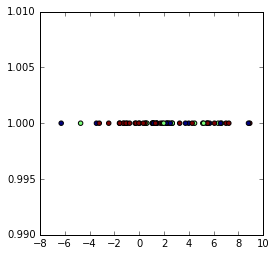

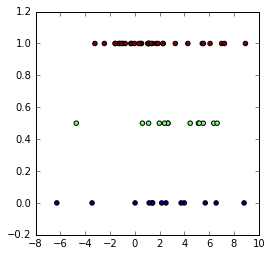

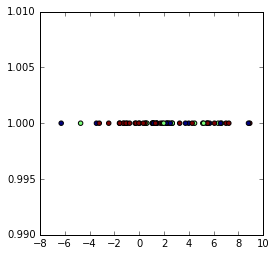

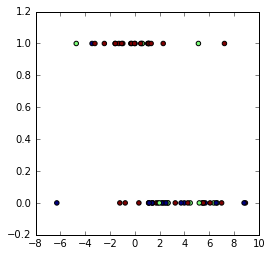

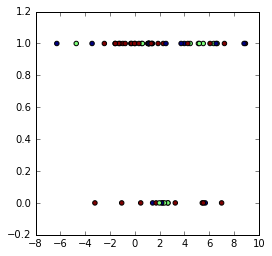

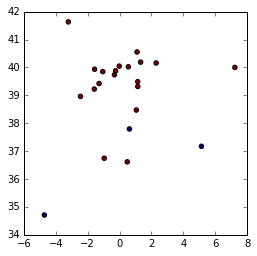

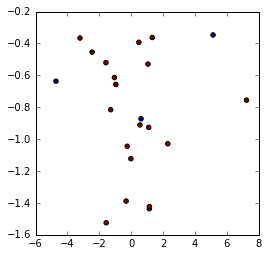

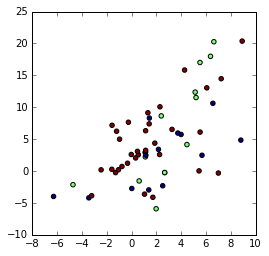

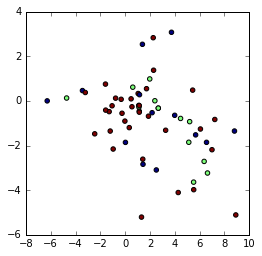

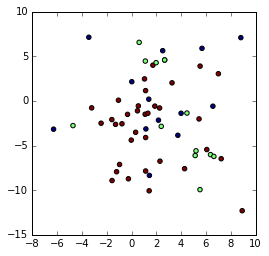

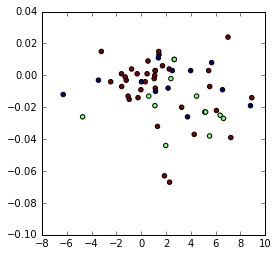

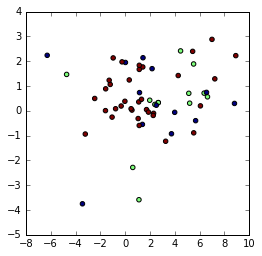

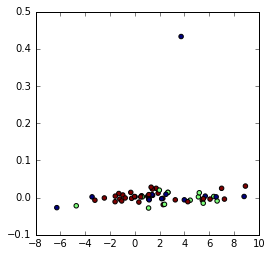

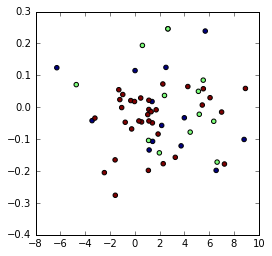

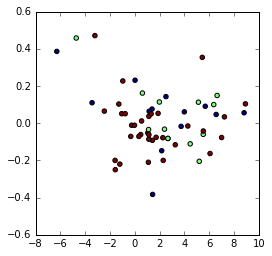

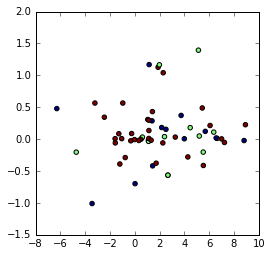

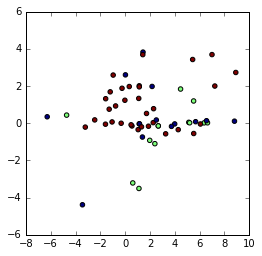

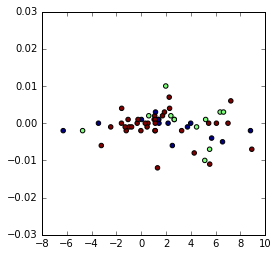

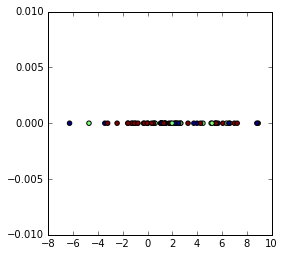

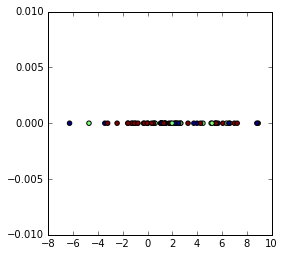

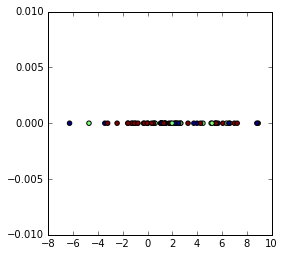

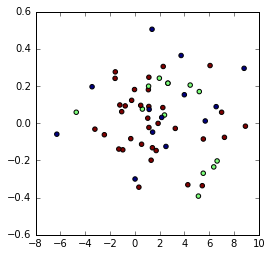

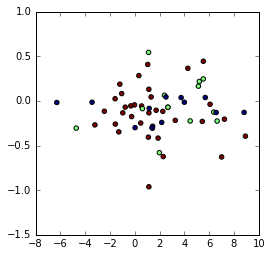

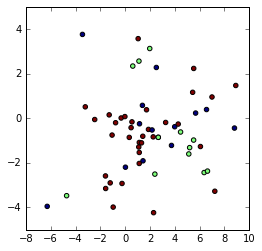

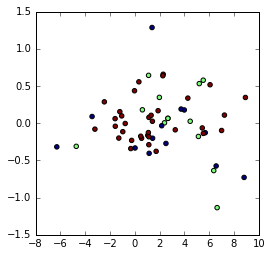

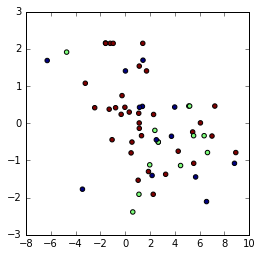

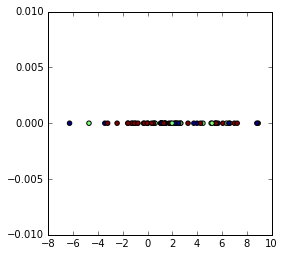

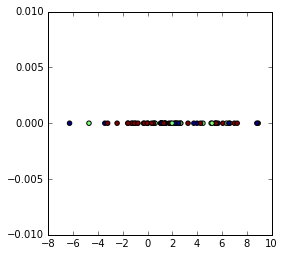

float64


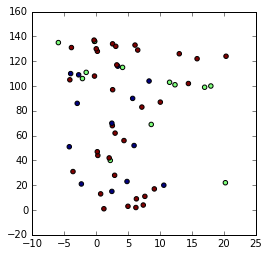

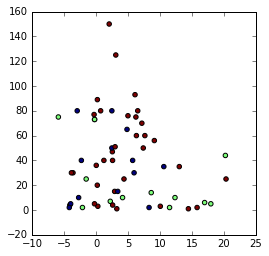

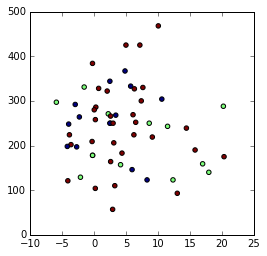

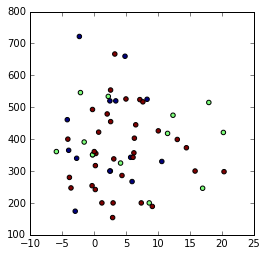

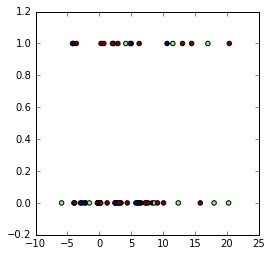

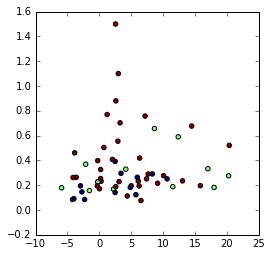

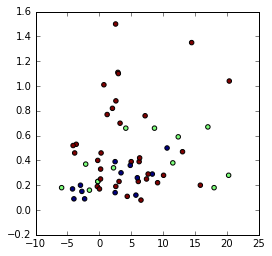

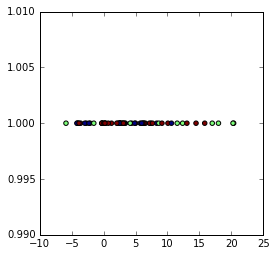

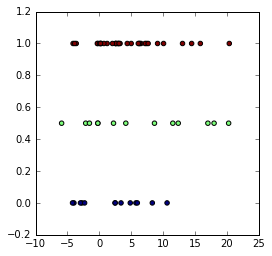

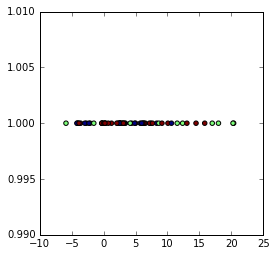

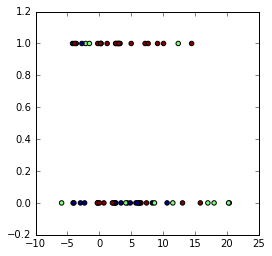

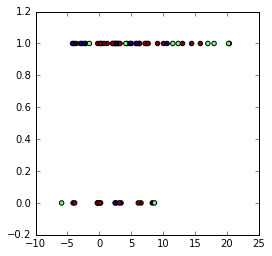

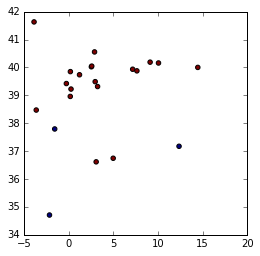

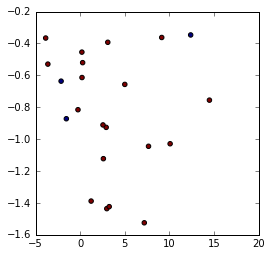

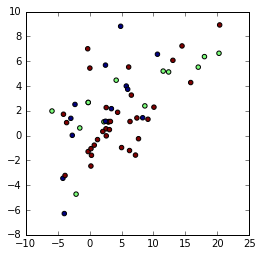

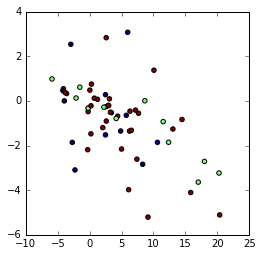

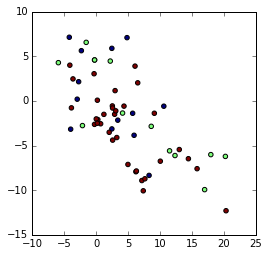

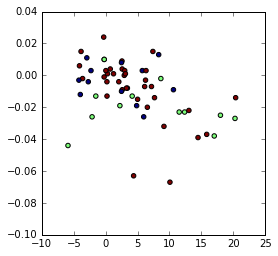

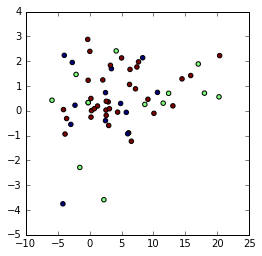

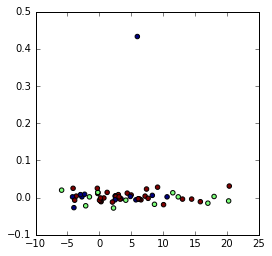

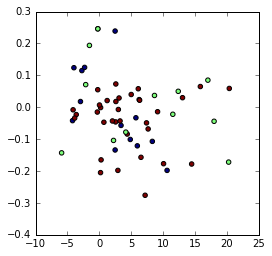

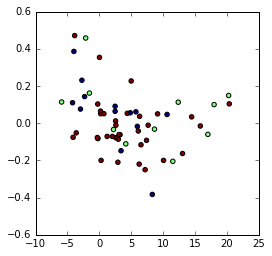

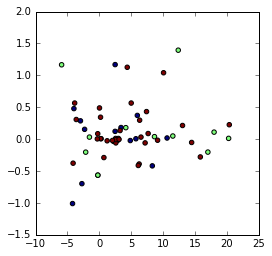

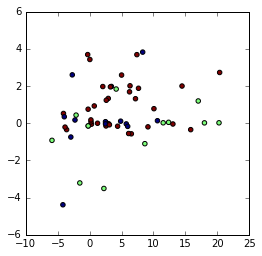

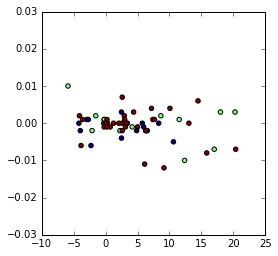

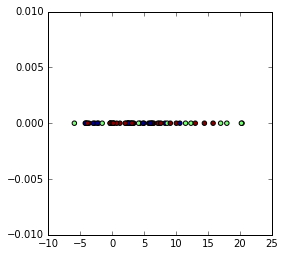

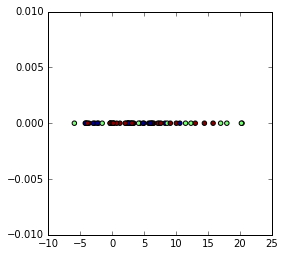

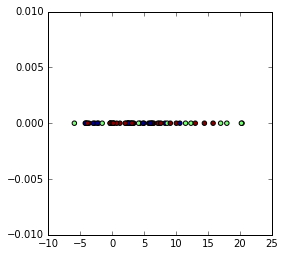

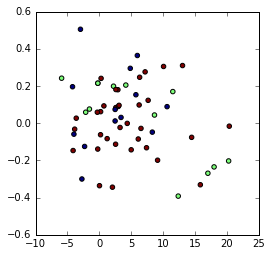

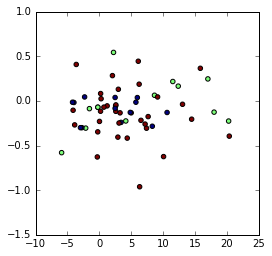

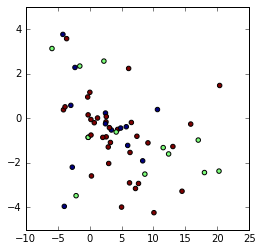

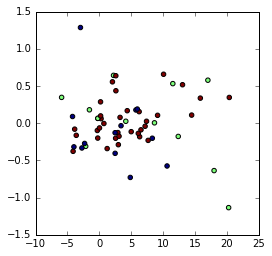

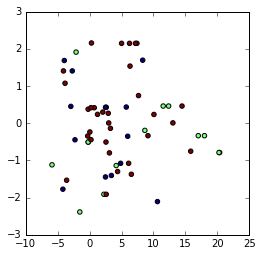

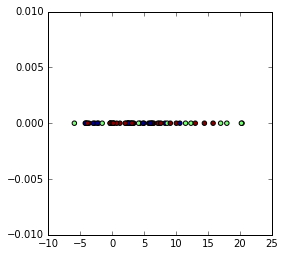

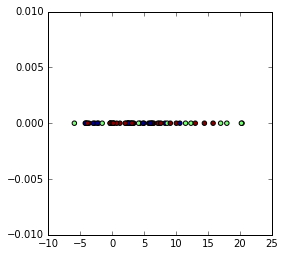

float64


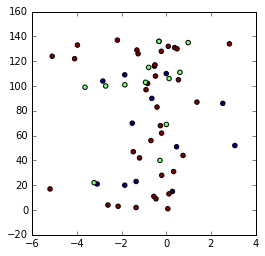

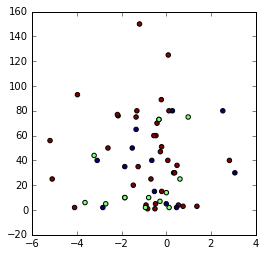

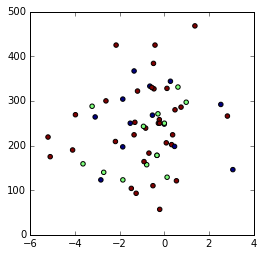

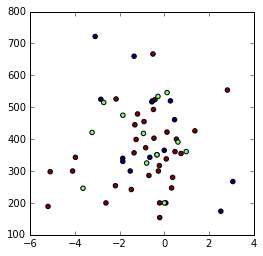

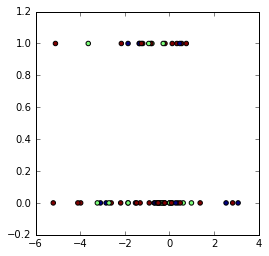

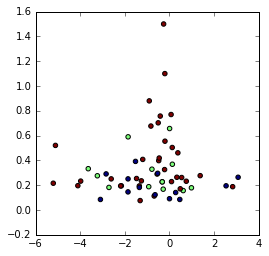

KeyboardInterrupt: 

In [27]:
# create pandas-parsable data 

#! ( head -1 protocols/ddg/ddg_predictions.out && grep -v desc protocols/ddg/ddg_predictions.out ) > protocols/ddg/readable_output
ddg_features = pandas.read_csv( 'protocols/results/apo_kellogg.out', sep='\s+', index_col='description' )
J = df.join( ddg_features )

%matplotlib inline
import matplotlib.pyplot as plt 

plt.scatter( J.fa_rep, J.total, c=J.protein_on_gel )



In [31]:

preds.index = preds.description.values
joined = preds.join( jj )
joined

ddG: description   total  fa_atr  fa_rep  fa_sol  fa_intra_rep  \
C167Q  ddG:       C167Q   7.123   4.771   0.167  -7.495         0.008   
C167Q  ddG:       C167Q   3.917  -9.104   3.124   5.132         0.000   
D403A  ddG:       D403A  -0.084   8.162  -2.992 -11.071        -0.024   
D403A  ddG:       D403A  -0.037   5.611  -0.695 -10.098        -0.010   
D55G   ddG:        D55G  -5.800   2.399   0.108  -5.663        -0.008   
D55G   ddG:        D55G  -2.896   2.002   0.558  -5.176        -0.022   
E154D  ddG:       E154D   5.108  -4.377   0.348   1.037        -0.007   
E154D  ddG:       E154D   1.733   2.605   0.279  -1.832         0.018   
E164A  ddG:       E164A   1.246  11.627  -1.906 -13.616        -0.085   
E164A  ddG:       E164A  -3.223   7.296  -1.810 -10.824         0.003   
E177A  ddG:       E177A  -0.731   1.029  -0.495  -3.457        -0.024   
E177A  ddG:       E177A  -0.361   7.804  -1.012 -10.885         0.003   
E406D  ddG:       E406D  10.201  -0.375  -0.568   0.573         0.011   
E406D  ddG:       E406D   1.322   6.610  -0.407  -7.735         0.006   
E426S  ddG:       E426S  -3.236  -1.003  -0.263   4.655        -0.008   
E426S  ddG:       E426S  -0.222  -0.024   1.390  -0.187        -0.009   
G174R  ddG:       G174R  13.066 -10.880   4.472  15.257         0.061   
G174R  ddG:       G174R  18.259  -7.393   5.560  10.213         0.047   
G22S   ddG:        G22S   2.216  -2.363   5.302   1.628         0.010   
G22S   ddG:        G22S   8.951  -3.006   5.576   2.627        -0.016   
H101R  ddG:       H101R   3.084   3.550  -0.581  -4.436        -0.003   
H101R  ddG:       H101R   0.543   3.462  -0.754  -0.705         0.010   
H178R  ddG:       H178R   0.562  -0.355   0.413   7.517         0.108   
H178R  ddG:       H178R   2.399  -3.592  -0.635  10.348         0.132   
H223G  ddG:       H223G   0.613   9.372  -2.140  -2.830         0.017   
H223G  ddG:       H223G   5.618  14.442  -1.874 -11.092         0.021   
H315N  ddG:       H315N   5.300   3.977  -0.244  -4.216         0.017   
H315N  ddG:       H315N   0.095   1.303  -0.243  -0.376         0.016   
H328C  ddG:       H328C  -2.408  10.578  -0.731 -10.742        -0.019   
H328C  ddG:       H328C  -0.766   3.783   0.948  -2.596         0.012   
...     ...         ...     ...     ...     ...     ...           ...   
W120A  ddG:       W120A   7.079  19.364  -4.741  -7.961        -0.037   
W120A  ddG:       W120A   4.122  20.385  -5.606  -8.105        -0.036   
W120F  ddG:       W120F   1.691   6.595  -3.799  -4.736        -0.006   
W120F  ddG:       W120F  -1.773   5.915  -3.021  -4.014        -0.008   
W247N  ddG:       W247N   7.820  11.106  -3.131   0.168        -0.026   
W247N  ddG:       W247N   8.209  14.747  -0.432  -4.167        -0.024   
W325L  ddG:       W325L   5.585  16.415  -2.039 -11.910         0.164   
W325L  ddG:       W325L   5.549  17.186  -1.460 -12.269         0.150   
W34A   ddG:        W34A   8.512  21.478  -3.590  -6.014        -0.017   
W34A   ddG:        W34A   9.688  16.985  -0.915  -4.455        -0.040   
W399C  ddG:       W399C   4.282  16.451  -1.498  -5.500        -0.028   
W399C  ddG:       W399C   7.645  15.670   0.048  -9.383        -0.050   
W399S  ddG:       W399S   9.946  12.606   0.185  -4.508        -0.048   
W399S  ddG:       W399S   5.103  19.739  -1.347 -10.282        -0.025   
W407C  ddG:       W407C  11.852  17.714  -3.185  -6.711         0.034   
W407C  ddG:       W407C   7.936  18.149  -2.554  -7.410        -0.038   
W407G  ddG:       W407G   5.351  20.957  -3.000 -10.517        -0.024   
W407G  ddG:       W407G   7.485  16.196  -2.838  -4.310        -0.037   
W407R  ddG:       W407R  12.019   5.413  -0.969   5.741        -0.028   
W407R  ddG:       W407R   7.325  10.600  -2.459   0.372        -0.031   
Y166D  ddG:       Y166D   8.362   4.285   0.637   4.117        -0.046   
Y166D  ddG:       Y166D   4.113   0.855  -2.694  12.115         0.003   
Y294A  ddG:       Y294A   8.613  15.448  -1.033  -5.825        -0

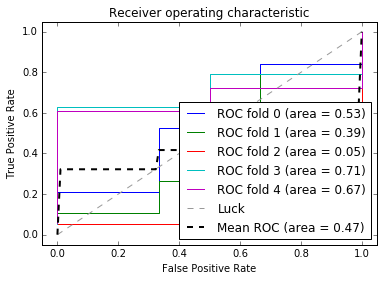

In [29]:
thresh = 1 
joined['delta_tm'] = joined.tm - 39.5

l = []
for name, row in joined.iterrows():
    if abs( row.delta_tm ) < thresh:
        l.append( 0 ) 
    else:
        l.append( 1 ) 
        
joined['big'] = l 

feats = [ 
    u'total', u'fa_atr', u'fa_rep', u'fa_sol',
    u'fa_intra_rep', u'fa_elec', u'pro_close', u'hbond_sr_bb',
    u'hbond_lr_bb', u'hbond_bb_sc', u'hbond_sc', u'dslf_fa13',
    u'coordinate_constraint', u'angle_constraint', u'dihedral_constraint',
    u'rama', u'omega', u'fa_dun', u'p_aa_pp', u'ref', u'chainbreak',
    u'res_type_constraint', u'big', 
]

# feats = [ 'big', 'total', 'fa_dun' ] 

my_df = joined[ feats ].dropna()

X = my_df.drop( [ 'big' ], axis=1 ).as_matrix()
y = my_df.big.as_matrix()

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

###############################################################################
# Data IO and generation

# import some data to play with
my_df = joined[ feats ].dropna()
X = my_df.drop( [ 'big' ], axis=1 ).as_matrix()
y = my_df.big.as_matrix()
n_samples, n_features = X.shape

random_state = np.random.RandomState(0)

###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=5)
classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
    label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

KendalltauResult(correlation=0.78723041955139983, pvalue=5.7664171774290183e-33)
SpearmanrResult(correlation=0.11427347845932057, pvalue=0.24345561294820742)


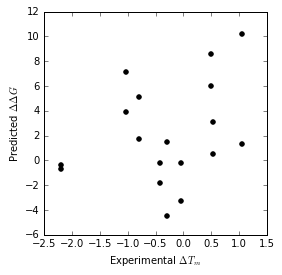

In [30]:
plt.figure( figsize=( 4, 4 ) )
plt.scatter( joined.delta_tm, joined.total, color='k' )
#plt.plot( ( joined.tm.min(), joined.tm.max() ), ( joined.total.max() , joined.total.min() ), color='red', alpha=0.4 ) #perfect correlation
plt.xlabel( 'Experimental $\Delta T_m$' )
plt.ylabel( 'Predicted $\Delta \Delta G$' )

from scipy.stats import pearsonr, kendalltau, spearmanr
print kendalltau( joined.delta_tm.values, joined.total.values )
print spearmanr( joined.delta_tm.values, joined.total.values )

total float64


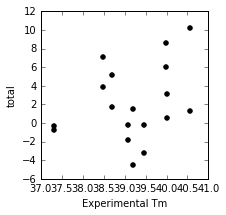

fa_atr float64


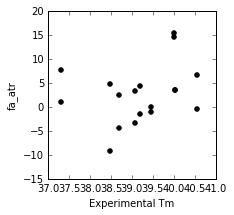

fa_rep float64


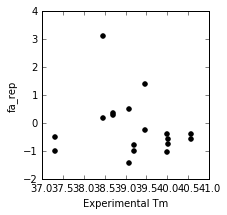

fa_sol float64


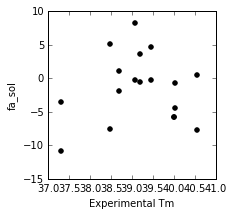

fa_intra_rep float64


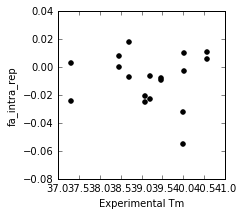

fa_elec float64


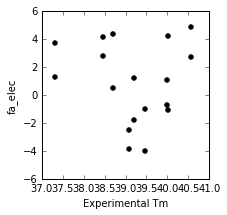

pro_close float64


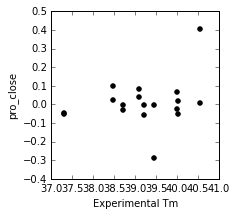

hbond_sr_bb float64


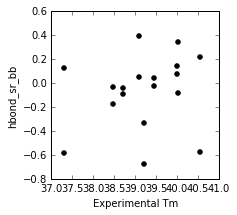

hbond_lr_bb float64


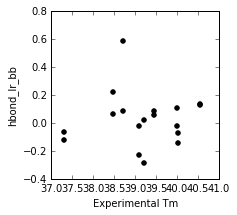

hbond_bb_sc float64


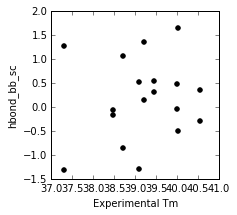

hbond_sc float64


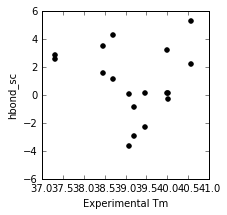

dslf_fa13 float64


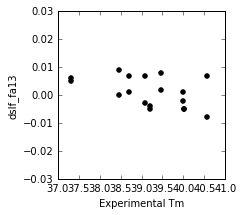

coordinate_constraint float64


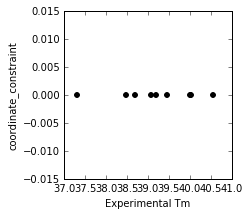

angle_constraint float64


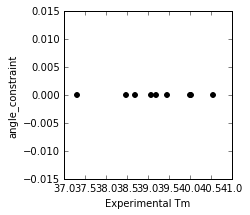

dihedral_constraint float64


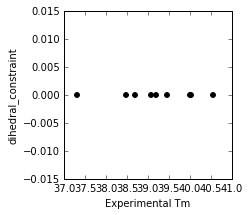

rama float64


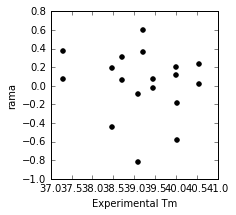

omega float64


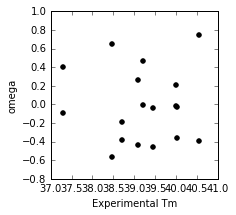

fa_dun float64


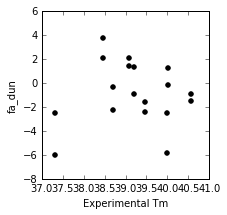

p_aa_pp float64


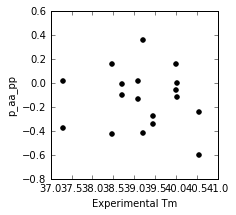

ref float64


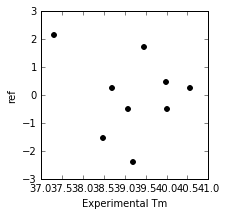

chainbreak float64


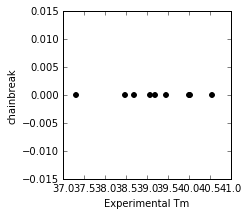

res_type_constraint float64


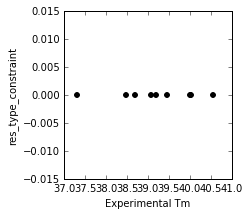

beads float64


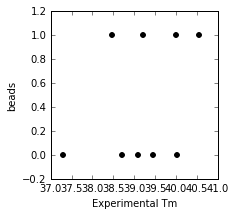

y float64


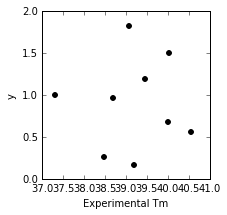

protein_on_gel float64


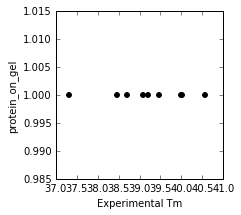

in_plos_paper float64


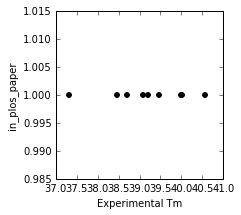

position float64


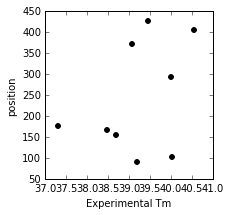

delta_tm float64


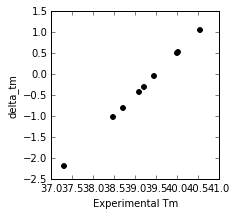

In [19]:
for col, dtype in zip( joined.columns, joined.dtypes ):
    if str( dtype ) == 'float64' and str( col ) not in ['tm', 'k']:
        print col, dtype
        plt.figure( figsize=( 3, 3 ) )
        plt.scatter( joined.tm, joined[col], color='k' )
        #plt.plot( ( joined.tm.min(), joined.tm.max() ), ( joined.total.max() , joined.total.min() ), color='red', alpha=0.4 ) #perfect correlation
        plt.xlabel( 'Experimental Tm' )
        plt.ylabel( col )
        plt.show()

So nothing really correlates, even predicted $\Delta G$ of folding. Bummmer. 

In [20]:
new_df = joined[ [ 'total', 'delta_tm' ] ]
new_df = new_df.dropna()

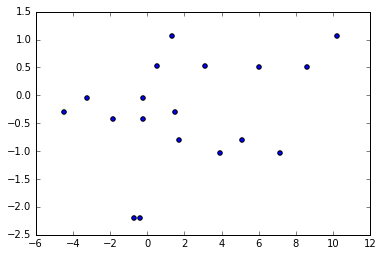

In [21]:
plt.scatter( new_df.total, new_df.delta_tm )

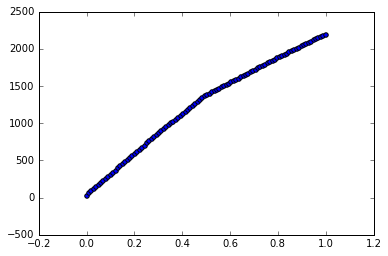

In [22]:
preds = []
actuals = [] 


from numpy import linspace

xx = []
yy = []

for i in linspace( 0, 1, 100 ):
    
    binsize = 1
    temp_bin_size = i

    for name, row in joined.iterrows():

        # classifier, how did we do? 
        # -1 is less stable, 0 is like WT, 1 is more stable 

        # preds 
        if -binsize <= row.total <= binsize:
            pred = 0 
        elif row.total < -binsize:
            pred = -1 
        elif row.total > binsize:
            pred = 1 

        # actuals 
        # preds 
        if -temp_bin_size <= row.delta_tm <= temp_bin_size:
            actual = 0 
        elif row.delta_tm < -temp_bin_size:
            actual = -1 
        elif row.delta_tm > temp_bin_size:
            actual = 1 

        preds.append( pred )
        actuals.append( actual )

    correct = [] 

    for ( pred, actual ) in zip( preds, actuals ):
        if pred == actual:
            correct.append( 1 )
        else:
            correct.append( 0 )

    xx.append( i )
    yy.append( sum( correct ) )
    
plt.scatter( xx, yy )

# Rosetta plus machine learning [outperforms `ddg_monomer`?]

Instead, let's make models of the mutants using `EnzRepackMinimize` and then try to use machine learning to get better correlation.

In [ ]:
df.head( 20 )

In [66]:
import pandas

def low_10( df ):
    return df.sort_values( [ 'all_cst', 'total_score' ] ).head( 10 )

models = pandas.read_csv( 'enzyme_design_protocol/scorefile.csv', index_col='name' ) 
models['name'] = models.index 
models = models.groupby( 'name' ).apply( low_10 )
models.index = models.name 

df = pandas.read_csv( 'data/pub_data.csv', index_col=0 )
df.tm = df.tm - 39.5
df = df[ [ 'tm' ] ]  

jnd = models.join( df ).dropna()

# clean up data for sklearn
x_cols = [ u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm',
       u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm',
       u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
       u'tot_total_pos_charges', u'tot_total_neg_charges', u'tot_seq_recovery',
       u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',
       u'SR_1_hbond_pm', u'SR_1_burunsat_pm',
       u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', u'SR_2_total_score',
       u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_all_cst', u'SR_2_hbond_pm',
       u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
       u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', 
       u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
       u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',
       u'SR_4_hbond_sc', u'SR_4_hbond_pm',
       u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
       u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', u'SR_5_all_cst',
       u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm',
       u'SR_5_burunsat_pm', 'tm' ]

jnd = jnd[ x_cols ]
jnd.to_csv( 'enzyme_design_protocol/clean_data_for_sklearn.csv' ) 

r2 score 0.259392802021
pearson (0.50942748346957911, 1.7057676556180694e-47)


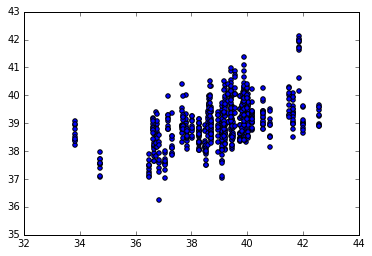

In [67]:
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import BaggingRegressor
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
%matplotlib inline

df = pandas.read_csv( 'enzyme_design_protocol/clean_data_for_sklearn.csv', index_col=0 ) 
X = df.drop( 'tm', axis=1 ) 
y = df.tm + 39.5

skf = StratifiedKFold( y, 10 )
net = ElasticNetCV( l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=skf, selection='random', normalize=True )
bag = BaggingRegressor( net, n_estimators=10, n_jobs=10 )

bag.fit( X, y ) 
preds = bag.predict( X ) 

plt.scatter( y, preds ) 
print 'r2 score', r2_score(y, preds) 
print 'pearson', pearsonr(y, preds) 

0.21912090047642752

In [ ]:
# reindex and join with experimental data 
df.index = df.name 
joined = df.join( fits )
joined.sample( 10 )

In [ ]:
# diagnostics and droping NaN values 
print len( joined )
joined.dropna( inplace = True )
print len( joined ), 'models'

# clean up data for sklearn
x_cols = [ u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm',
       u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm',
       u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
       u'tot_total_pos_charges', u'tot_total_neg_charges', u'tot_seq_recovery',
       u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',
       u'SR_1_hbond_pm', u'SR_1_burunsat_pm',
       u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', u'SR_2_total_score',
       u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_all_cst', u'SR_2_hbond_pm',
       u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
       u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', 
       u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
       u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',
       u'SR_4_hbond_sc', u'SR_4_hbond_pm',
       u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
       u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', u'SR_5_all_cst',
       u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm',
       u'SR_5_burunsat_pm', ]

X = joined[ x_cols ]
y = joined[ 'tm' ]

Now we actually fit the data to the model

In [ ]:
params = { 'l1_ratio': [.1, .5, .7, .9, .95, .99, 1] }

from sklearn.cross_validation import StratifiedKFold
from scipy.stats.stats import pearsonr

for i in [ 1, 10, 100, 1000 ]:
    #skf = StratifiedKFold( y, 10 )
    net = ElasticNetCV( cv=10 )
    grid = GridSearchCV( net, params )
    bag = BaggingRegressor( grid, n_estimators=i )
    bag.fit( X, y )

    preds = bag.predict( X )
    print 'Number of models', i 
    print 'PCC={}'.format( pearsonr( preds, y ) )

    plt.figure( figsize=(4,4) )
    plt.scatter( preds, y, alpha=0.3, marker='.', color='k' )
    plt.xlabel( 'Predicted' )
    plt.ylabel( 'Actual' )
    plt.show()
    
    weights = pandas.DataFrame( zip( X.columns, bag.estimators_[0].best_estimator_.coef_ ), columns=['feature', 'weight'] )
    print weights.sort( 'weight' )[0:11]

So that's fairly underwhelming. Let's try something else. 

## Structures minimized with `ddg_monomer` scored using EnzDes-style metrics 

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import BaggingRegressor
from sklearn.grid_search import GridSearchCV
from glob import glob 


df = pandas.read_csv( 'enzdes_score_ddg/out/score.sc', sep='\s+' )
print len( df ), 'models'
df.sample( 10 )

# # reindex and join with experimental data 
# df.index = df.name 
# joined = df.join( fits )
# joined.sample( 10 )

# # diagnostics and droping NaN values 
# print len( joined )
# joined.dropna( inplace = True )
# print len( joined ), 'models'

# # clean up data for sklearn
# x_cols = [ u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm',
#        u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm',
#        u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
#        u'tot_total_pos_charges', u'tot_total_neg_charges', u'tot_seq_recovery',
#        u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',
#        u'SR_1_hbond_pm', u'SR_1_burunsat_pm',
#        u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', u'SR_2_total_score',
#        u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_all_cst', u'SR_2_hbond_pm',
#        u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
#        u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', 
#        u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
#        u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',
#        u'SR_4_hbond_sc', u'SR_4_hbond_pm',
#        u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
#        u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', u'SR_5_all_cst',
#        u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm',
#        u'SR_5_burunsat_pm', ]

# X = joined[ x_cols ]
# y = joined[ 'tm' ]

# params = { 'l1_ratio': [.1, .5, .7, .9, .95, .99, 1] }

# from sklearn.cross_validation import StratifiedKFold
# from scipy.stats.stats import pearsonr

# for i in [ 1, 10, 100, 1000 ]:
#     #skf = StratifiedKFold( y, 10 )
#     net = ElasticNetCV( cv=10 )
#     grid = GridSearchCV( net, params )
#     bag = BaggingRegressor( grid, n_estimators=i )
#     bag.fit( X, y )

#     preds = bag.predict( X )
#     print 'Number of models', i 
#     print 'PCC={}'.format( pearsonr( preds, y ) )

#     plt.figure( figsize=(4,4) )
#     plt.scatter( preds, y, alpha=0.3, marker='.', color='k' )
#     plt.xlabel( 'Predicted' )
#     plt.ylabel( 'Actual' )
#     plt.show()
    
#     weights = pandas.DataFrame( zip( X.columns, bag.estimators_[0].best_estimator_.coef_ ), columns=['feature', 'weight'] )
#     print weights.sort( 'weight' )[0:11]

## Individual plots for W120F and N407C

As per Siena's request Sunday, March 20

In [ ]:
import pandas 

df = pandas.read_csv( '/Users/alex/Downloads/Bagel Thermostability - Best Mutants.csv' )
grouped = df.groupby( [ 'mutant', 'trial' ] )

for i, df in grouped:
    df.rate = df.rate / df.rate.max()

    # linear fit 
    reg = LinearRegression()
    reg.fit( df.temp.reshape(-1, 1), df.rate )
    slope = reg.coef_[0]

    p0 = ( df.temp.mean(), slope )
    popt, pcov = curve_fit( f, df.temp, df.rate, p0=p0 )
    perr = sqrt( diag( pcov ) ) 

    plt.figure()
    plt.xlabel( 'T (C)' )
    plt.xlim( 25, 55 )
    plt.scatter( df.temp, df.rate )
    xs = linspace( df.temp.min(), df.temp.max(), 100 )
    plt.plot( xs, f( xs, *popt ) )
    wts = linspace( 30, 50, 100 )
    plt.plot( wts, f( wts, 39.88, -1.12 ) ) 
    plt.legend( [ i, 'Wild type BglB'] )
    plt.text( 30, 0.2, 'Tm = {:2.1f} C'.format( popt[0] ), size=12 )
    plt.text( 30, 0, 'k = {:2.2f}'.format( popt[1] ), size=12 )
    plt.show()

In [ ]:
import pandas 

df = pandas.read_csv( '/Users/alex/Downloads/Bagel Thermostability - Best Mutants.csv' )
grouped = df.groupby( [ 'mutant' ] )

for i, df in grouped:
    df.rate = df.rate / df.rate.max()

    # linear fit 
    reg = LinearRegression()
    reg.fit( df.temp.reshape(-1, 1), df.rate )
    slope = reg.coef_[0]

    p0 = ( df.temp.mean(), slope )
    popt, pcov = curve_fit( f, df.temp, df.rate, p0=p0 )
    perr = sqrt( diag( pcov ) ) 

    plt.figure()
    plt.xlabel( 'T (C)' )
    plt.xlim( 25, 55 )
    plt.scatter( df.temp, df.rate, c=df.trial, cmap='Blues' )
    xs = linspace( df.temp.min(), df.temp.max(), 100 )
    plt.plot( xs, f( xs, *popt ) )
    wts = linspace( 30, 50, 100 )
    plt.plot( wts, f( wts, 39.88, -1.12 ) ) 
    plt.legend( [ i, 'Wild type BglB'] )
    plt.text( 30, 0.2, 'Tm = {:2.1f} C'.format( popt[0] ), size=12 )
    plt.text( 30, 0, 'k = {:2.2f}'.format( popt[1] ), size=12 )
    plt.show()

## Production and purification data 

In [ ]:
df = pandas.read_csv( 'data/Bagel Thermostability - Thermostability protein production progress.csv', index_col='mutant' )

---

In [2]:
import pandas

df = pandas.read_csv( 'data/pub_data.csv', index_col=0 )
df = df[ [ 'tm' ] ]  

models = pandas.read_csv( '../bagel-benchmark/

tm
N404A  42.005791
Y294A  39.999766
S298E  39.566838